In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor

In [3]:
# Загружаем данные из файлов
calls_contacts = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Join_file/Contacts_and_Calls.parquet')
deals_spend = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Join_file/Spend_and_Deals.parquet')
deals_contacts = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Join_file/Contact_and_Deals.parquet')

In [4]:
# Загружаем данные из файлов
contacts_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/ContactsClean.parquet')
calls_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/CallsClean.parquet')
spend_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/SpendClean.parquet')
deals_df = pd.read_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/DealsClean.parquet')

In [5]:
deals_contacts.shape

(21291, 28)

In [6]:
deals_contacts.columns
deals_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id_deals               21291 non-null  object        
 1   Deal Owner Name        21291 non-null  object        
 2   Closing Date           14494 non-null  datetime64[ns]
 3   Quality                21291 non-null  object        
 4   Stage                  21291 non-null  object        
 5   Lost Reason            21291 non-null  object        
 6   Campaign               21291 non-null  object        
 7   SLA                    15276 non-null  float64       
 8   Content                13938 non-null  object        
 9   Term                   12242 non-null  object        
 10  Source                 21291 non-null  object        
 11  Payment Type           719 non-null    object        
 12  Product                3536 non-null   object        
 13  E

In [7]:
deals_spend.shape


(21291, 27)

In [8]:
deals_spend.columns
deals_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         719 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-n

In [9]:
deals_spend.isna().sum()

Id                         0
Deal Owner Name            0
Closing Date            6797
Quality                    0
Stage                      0
Lost Reason                0
Campaign                   0
SLA                     6015
Content                 7353
Term                    9049
Source                     0
Payment Type           20572
Product                17755
Education Type         18044
Created Time               0
Course duration        17760
Months of study        18047
Initial Amount Paid    17189
Offer Total Amount     17169
Contact Name               0
City                       0
Country                    0
Deutsch Level              0
Deutsch Category       20121
Impressions            13226
Clicks                 13226
Spend                  13226
dtype: int64

In [10]:
calls_contacts.shape

(95275, 13)

In [11]:
calls_contacts.columns

Index(['Id_contacts', 'Contact Owner Name', 'Created Time', 'Modified Time',
       'Id_calls', 'Call Start Time', 'Call Owner Name', 'Call Type',
       'Call Duration', 'Call Status', 'Outgoing Call Status',
       'Scheduled in CRM', 'Owner Match'],
      dtype='object')

In [12]:
calls_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95275 entries, 0 to 95274
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id_contacts           95275 non-null  object        
 1   Contact Owner Name    95275 non-null  object        
 2   Created Time          95275 non-null  datetime64[ns]
 3   Modified Time         95275 non-null  datetime64[ns]
 4   Id_calls              91941 non-null  object        
 5   Call Start Time       91941 non-null  datetime64[ns]
 6   Call Owner Name       91941 non-null  object        
 7   Call Type             91941 non-null  object        
 8   Call Duration         91941 non-null  float64       
 9   Call Status           91941 non-null  object        
 10  Outgoing Call Status  91941 non-null  object        
 11  Scheduled in CRM      91941 non-null  object        
 12  Owner Match           95275 non-null  bool          
dtypes: bool(1), date

# **# Анализ временных рядов**

1. Проанализируйте тенденцию создания сделок с течением времени и их связь с звонками

2. Изучите распределение времени закрытия сделок и продолжительность периода от создания до закрытия

In [13]:
calls_contacts['Call Start Time'].min()

Timestamp('2023-06-30 09:20:00')

In [14]:
calls_contacts['Call Start Time'].max()

Timestamp('2024-06-21 15:30:00')

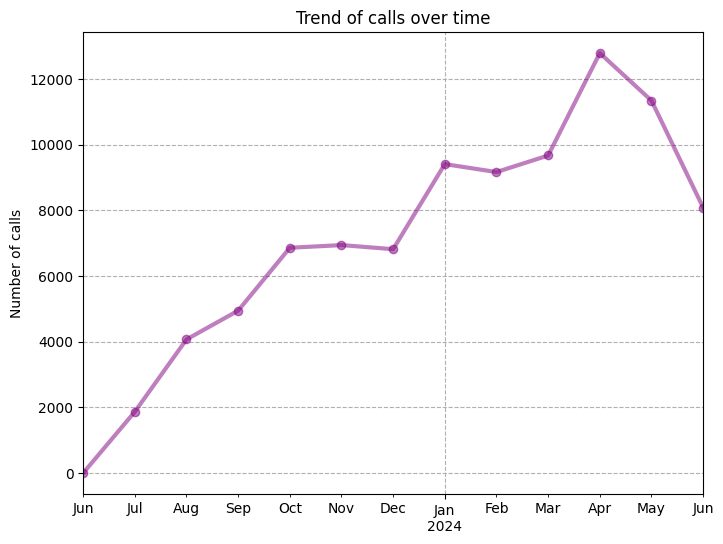

In [15]:
# Группировка по месяцу и подсчёт количества записей
calls_by_month = calls_contacts.groupby(calls_contacts['Call Start Time'].dt.to_period('M')).size()

plt.figure(figsize=(8, 6))
calls_by_month.plot(kind='line', alpha=0.5, color ='purple', lw=3, marker='o')
plt.title('Trend of calls over time')
plt.xlabel('')
plt.ylabel('Number of calls')
plt.grid(linestyle='--')
plt.show()

In [16]:
deals_contacts.describe()

Closing Date            SLA  \
count                          14494   15276.000000   
mean   2024-01-27 12:02:30.028977408    1930.794632   
min              2023-07-03 00:00:00       0.050000   
25%              2023-11-10 00:00:00      73.145000   
50%              2024-02-07 00:00:00     331.850000   
75%              2024-04-16 00:00:00     936.707500   
max              2024-09-25 00:00:00  448474.400000   
std                              NaN   12321.257991   

                  Created Time_deals  Course duration  Months of study  \
count                          21291      3531.000000      3244.000000   
mean   2024-01-26 17:32:51.951528704        10.197111         3.487361   
min              2023-07-03 17:03:00         6.000000         1.000000   
25%              2023-11-18 05:08:30        11.000000         3.000000   
50%              2024-02-04 22:51:00        11.000000         3.000000   
75%              2024-04-13 08:22:00        11.000000         3.000000   
max              2024-06-21 15:30:00        11.000000        11.000000   
std                              NaN         1.835965         1.937863   

       Initial Amount Paid  Offer Total Amount  Deutsch Category  \
count          4102.000000         4122.000000       1170.000000   
mean            935.097026         7116.877487          3.030769   
min               0.000000            0.000000          1.000000   
25%             300.000000         3000.000000          3.000000   
50%            1000.000000        11000.000000          3.000000   
75%            1000.000000        11000.000000          3.000000   
max           11500.000000        11500.000000          6.000000   
std            1405.833982         4648.619831          0.683980   

               Created Time_contacts                  Modified Time  
count                          21290                          21290  
mean   2024-01-14 22:24:07.626115584  2024-02-19 16:14:10.531705088  
min              2023-07-02 22:37:00            2023-07-17 19:38:00  
25%              2023-10-31 20:26:30            2023-12-12 22:43:15  
50%              2024-01-23 10:42:30            2024-03-06 21:49:00  
75%              2024-04-04 20:57:30            2024-04-30 16:49:45  
max              2024-06-21 15:30:00            2024-06-21 15:32:00  
std                              NaN                            NaN

In [17]:
deals_contacts['Closing Date'].min()

Timestamp('2023-07-03 00:00:00')

In [18]:
# не может быть дата закрвтия после июня 2024 года
deals_contacts['Closing Date'].max()

Timestamp('2024-09-25 00:00:00')

In [19]:
mask = (deals_contacts['Closing Date'].dt.year == 2024) & (deals_contacts['Closing Date'].dt.month >= 7)
deals_contacts.loc[mask].head()

Id_deals Deal Owner Name Closing Date     Quality  \
13398  5805028000023038521   Victor Barnes   2024-09-25  Non Target   

              Stage       Lost Reason           Campaign    SLA  \
13398  Payment Done  Gutstein refusal  12.07.2023wide_DE  12.47   

                 Content  Term  ... Offer Total Amount         Contact Name  \
13398  bloggersvideo9com  wide  ...            11000.0  5805028000005950094   

                       City  Country Deutsch Level  Deutsch Category  \
13398  Neuburg an der Donau  Germany            B1               3.0   

               Id_contacts  Contact Owner Name  Created Time_contacts  \
13398  5805028000005950094       Victor Barnes    2023-08-27 17:23:00   

            Modified Time  
13398 2023-12-30 20:48:00  

[1 rows x 28 columns]

In [20]:
deals_contacts.loc[mask, 'Closing Date'] = pd.NaT

In [21]:
deals_contacts['Closing Date'].max()

Timestamp('2024-06-25 00:00:00')

Теперь можно посмотреть закрытые сделки по времени и объеденит два графика

In [22]:
# Группировка по месяцу и подсчёт количества записей
deals_filtered = deals_contacts[deals_contacts['Closing Date'] != pd.NaT]
deals_by_month = deals_filtered.groupby(deals_filtered['Closing Date'].dt.to_period('M')).size()

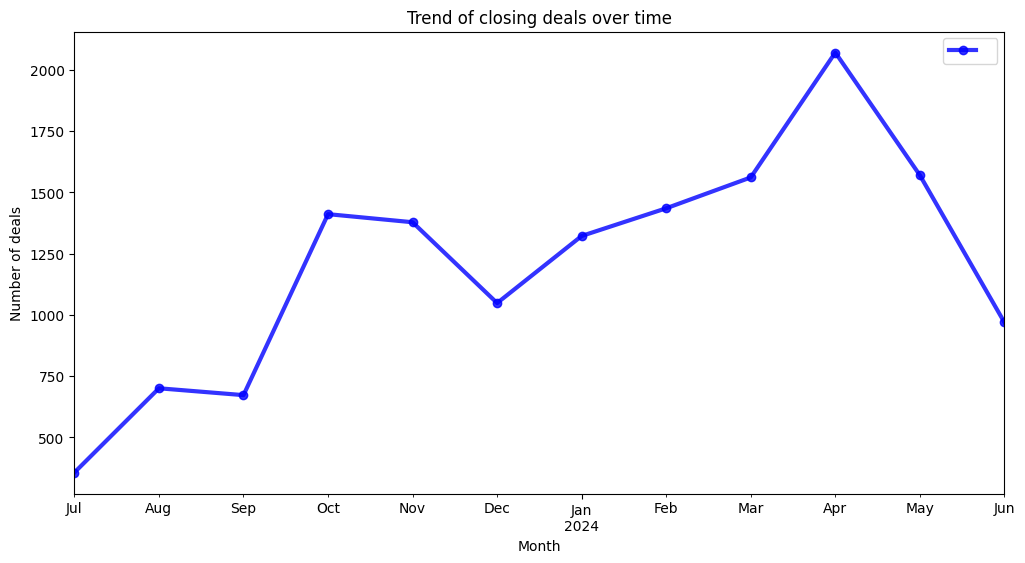

In [23]:
plt.figure(figsize=(12, 6))
deals_by_month.plot(kind='line', alpha=0.8, label=" ", color ='blue', lw=3, marker='o')
plt.title('Trend of closing deals over time')
plt.xlabel('Month')
plt.ylabel('Number of deals')
plt.xticks(rotation=0)
plt.legend()
plt.show()

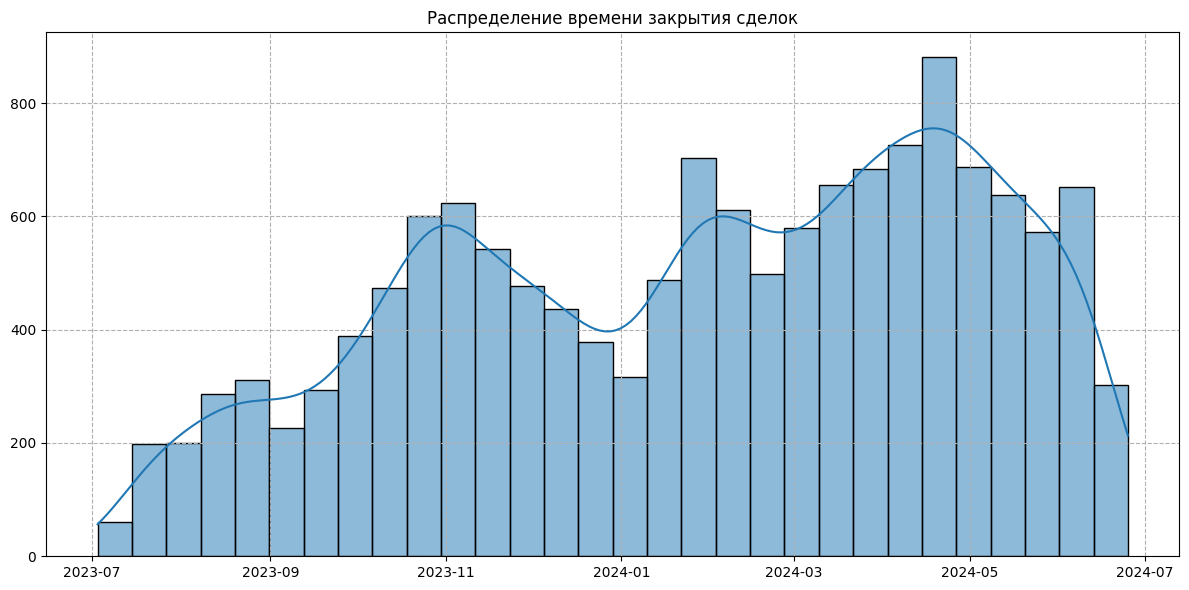

In [24]:
#Изучение распределения времени закрытия сделок

plt.figure(figsize=(12, 6))
sns.histplot(deals_contacts['Closing Date'].dropna(), bins=30, kde=True)
plt.title('Распределение времени закрытия сделок')
plt.xlabel('')
plt.ylabel('')
plt.grid(linestyle='--')

plt.tight_layout()
plt.show()

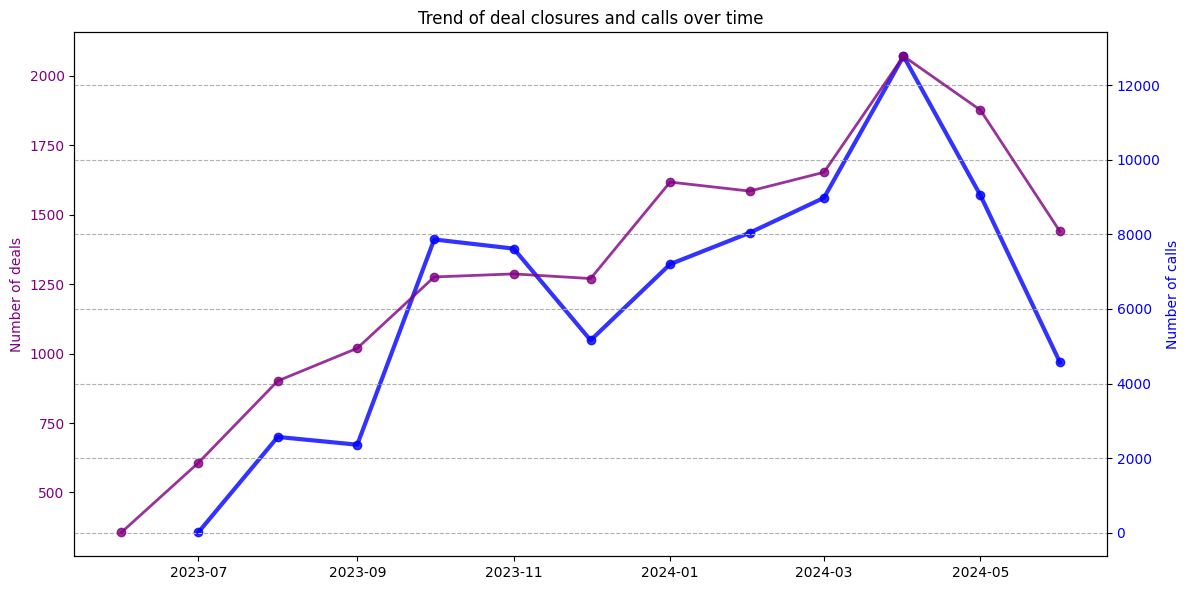

In [25]:
deals_filtered = deals_contacts[deals_contacts['Closing Date'] != pd.NaT]
deals_by_month = deals_filtered.groupby(deals_filtered['Closing Date'].dt.to_period('M')).size()

calls_by_month = calls_contacts.groupby(calls_contacts['Call Start Time'].dt.to_period('M')).size()

deals_by_month.index = deals_by_month.index.to_timestamp()
calls_by_month.index = calls_by_month.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(deals_by_month.index, deals_by_month.values, alpha=0.8, color='blue', lw=3, marker='o')
ax1.set_xlabel('')
ax1.set_ylabel('Number of deals', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.plot(calls_by_month.index, calls_by_month.values, alpha=0.8, color='purple', lw=2, marker='o')
ax2.set_ylabel('Number of calls', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


plt.title('Trend of deal closures and calls over time')

plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(linestyle='--')

plt.show()

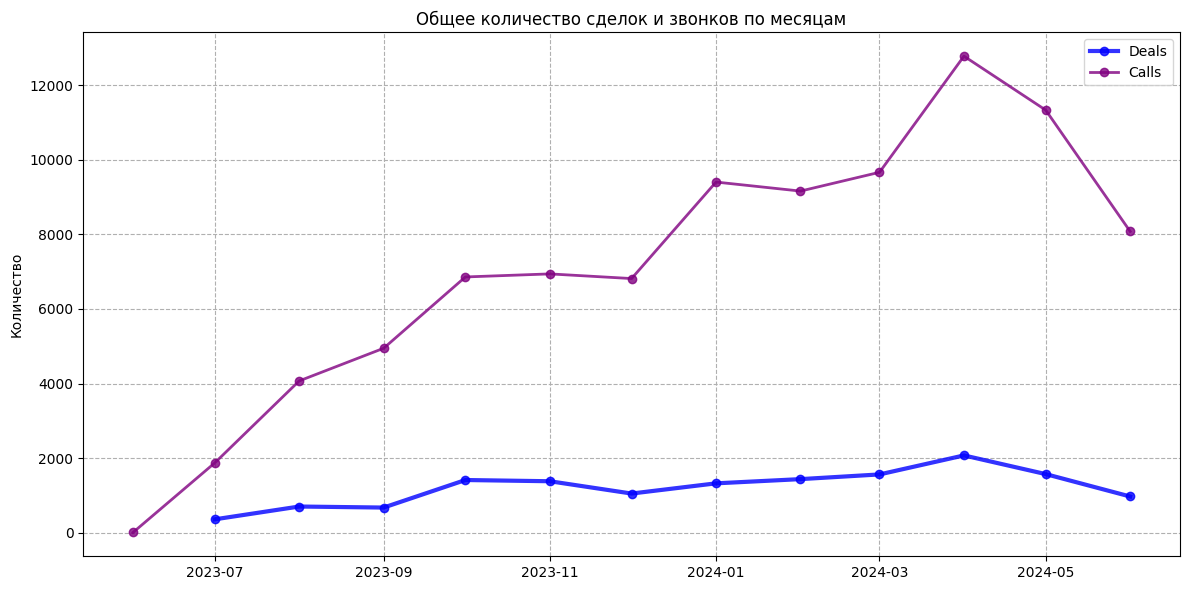

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(deals_by_month.index, deals_by_month.values, alpha=0.8, color='blue', lw=3, marker='o', label='Deals')
ax.plot(calls_by_month.index, calls_by_month.values, alpha=0.8, color='purple', lw=2, marker='o', label='Calls')

ax.set_ylabel('Количество', color='black')
ax.set_title('Общее количество сделок и звонков по месяцам')
ax.legend()
ax.grid(linestyle='--')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
deals_contacts['Created Month'] = deals_contacts['Created Time_deals'].dt.to_period('M')
created_by_month = deals_contacts.groupby('Created Month').size()

deals_filtered = deals_contacts[deals_contacts['Closing Date'] != pd.NaT]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')
closed_by_month = deals_filtered.groupby('Deal Month').size()

summary = pd.DataFrame({
    'Created': created_by_month,
    'Closed': closed_by_month
}).fillna(0).astype(int)
summary = summary[(summary['Created'] != 0)]
summary['Closed Percentage'] = ((summary['Closed'] / summary['Created']) * 100).round(1).astype(str) + '%'
summary

Created  Closed Closed Percentage
2023-07      638     356             55.8%
2023-08     1082     700             64.7%
2023-09     1068     672             62.9%
2023-10     1588    1411             88.9%
2023-11     1937    1378             71.1%
2023-12     1761    1048             59.5%
2024-01     2204    1322             60.0%
2024-02     2180    1435             65.8%
2024-03     2248    1561             69.4%
2024-04     3070    2071             67.5%
2024-05     1856    1570             84.6%
2024-06     1659     969             58.4%

<Figure size 1400x600 with 0 Axes>

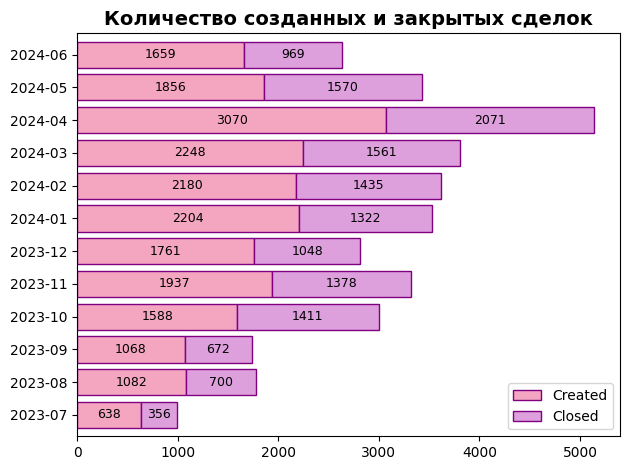

In [28]:
plt.figure(figsize=(14, 6))
ax = summary[['Created', 'Closed']].plot(
    kind='barh',
    stacked=True,
    color=['#F4A6C1', '#DDA0DD'],  # мягкие цвета
    edgecolor='purple',
    width=0.8
)

# Добавление подписей на барах
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='black')

# Название и подписи осей
plt.title('Количество созданных и закрытых сделок', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

# Легенда
plt.legend(loc='lower right')

# Финальное выравнивание
plt.tight_layout()
plt.show()

Рост числа созданных и закрытых сделок: В целом, наблюдается тенденция к увеличению как количества создаваемых, так и количества закрываемых сделок. Это может свидетельствовать об общем росте бизнеса. Видна определенная сезонность. В некоторые месяцы (например, в начале года) наблюдается снижение количества создаваемых сделок, что может быть связано с праздничными днями. Количество созданных сделок превышает закрываемые. Наблюдаются пики и спады в количестве сделок

In [29]:
# Выполнение анализа - количество звонков по статусу для каждой сделки
call_status_counts = calls_contacts.groupby(['Call Owner Name', 'Call Status']).size().unstack(fill_value=0)
display(call_status_counts)


Call Status      Attended Dialled  Missed  Overdue  Received  \
Call Owner Name                                                
Alice Johnson                 909       3        0        13   
Amy Green                    3934     259        0       138   
Ben Hall                     2459       0        0         0   
Bob Brown                      90       0        0         0   
Cara Iverson                 2296       0        0         0   
Charlie Davis                5079     563        0       235   
Derek James                   687       0        0        82   
Diana Evans                  5119     291        0       249   
Ethan Harris                  240       7        0         0   
Eva Kent                      345       4        0         7   
Fiona Jackson                  64     352        0         4   
George King                   576      59        0        22   
Hannah Lee                    137      16        0         5   
Ian Miller                   5497      93        0       123   
Jane Smith                   2044     288        0       169   
John Doe                     1257     904        0       236   
Julia Nelson                 5396     374        0       318   
Kevin Parker                 4143     357        0        97   
Mason Roberts                 997       0        0         3   
Nina Scott                   3593     468        0       174   
Oliver Taylor                   7       0        0         0   
Paula Underwood              3544     247        0       114   
Quincy Vincent               3431     204        1        57   
Rachel White                  392       0        0         0   
Sam Young                     354      12        0        26   
Tina Zhang                      0       4        0         0   
Ulysses Adams                4563     263        0       256   
Victor Barnes                4169      21        4        82   
Wendy Clark                   143       0        0         1   
Xander Dean                   268       0        0         0   
Yara Edwards                 6518     327        0       265   
Zachary Foster                390      18        0        19   

Call Status      Scheduled Unattended Delay  Unattended Dialled  
Call Owner Name                                                  
Alice Johnson                             0                 302  
Amy Green                                 0                1495  
Ben Hall                                  0                 410  
Bob Brown                                 0                   4  
Cara Iverson                              0                 998  
Charlie Davis                             0                 957  
Derek James                               0                  90  
Diana Evans                               0                1011  
Ethan Harris                              0                  27  
Eva Kent                                  0                 130  
Fiona Jackson                             0                  11  
George King                               0                 170  
Hannah Lee                                0                  15  
Ian Miller                                0                1185  
Jane Smith                                0                1107  
John Doe                                  0                 145  
Julia Nelson                              0                1074  
Kevin Parker                              0                 497  
Mason Roberts                             0                 132  
Nina Scott                                0                1114  
Oliver Taylor                             0                   1  
Paula Underwood                           0                 538  
Quincy Vincent                            0                 575  
Rachel White                              0                  46  
Sam Young                                 0                  54  
Tina Zhang                               

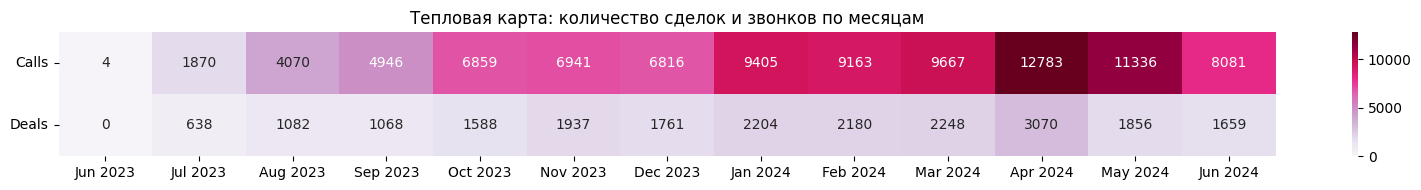

In [30]:
# Преобразование дат
deals_contacts['Created Time_deals'] = pd.to_datetime(deals_contacts['Created Time_deals'], errors='coerce')
calls_contacts['Call Start Time'] = pd.to_datetime(calls_contacts['Call Start Time'], errors='coerce')

# Выделение месяца
deals_contacts['Month'] = deals_contacts['Created Time_deals'].dt.to_period('M').dt.to_timestamp()
calls_contacts['Month'] = calls_contacts['Call Start Time'].dt.to_period('M').dt.to_timestamp()

# Подсчёт количества по месяцам
monthly_deals = deals_contacts.groupby('Month').size().rename("Deals")
monthly_calls = calls_contacts.groupby('Month').size().rename("Calls")

# Объединение и преобразование данных
time_series_df = pd.concat([monthly_deals, monthly_calls], axis=1).fillna(0).astype(int).reset_index()
heatmap_data = time_series_df.melt(id_vars='Month', value_vars=['Deals', 'Calls'], var_name='Metric', value_name='Count')
heatmap_pivot = heatmap_data.pivot(index='Metric', columns='Month', values='Count')

heatmap_pivot.columns = heatmap_pivot.columns.strftime('%b %Y')

# Построение тепловой карты
plt.figure(figsize=(16, 2))
sns.heatmap(heatmap_pivot, annot=True, fmt="d", cmap="PuRd")
plt.title("Тепловая карта: количество сделок и звонков по месяцам")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


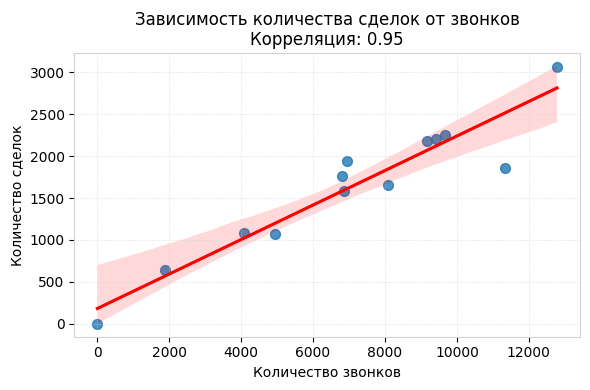

In [31]:
# Преобразование дат
calls_contacts['Call Start Time'] = pd.to_datetime(calls_contacts['Call Start Time'], errors='coerce')
deals_contacts['Created Time_deals'] = pd.to_datetime(deals_contacts['Created Time_deals'], errors='coerce')

# Добавление месяца
calls_contacts['Month'] = calls_contacts['Call Start Time'].dt.to_period('M').dt.to_timestamp()
deals_contacts['Month'] = deals_contacts['Created Time_deals'].dt.to_period('M').dt.to_timestamp()

# Подсчёт количества звонков и сделок по месяцам
monthly_calls = calls_contacts.groupby('Month').size().rename("Calls")
monthly_deals = deals_contacts.groupby('Month').size().rename("Deals")

# Объединение
time_series_df = pd.concat([monthly_deals, monthly_calls], axis=1).fillna(0).astype(int).reset_index()

# Расчёт корреляции
correlation = time_series_df['Calls'].corr(time_series_df['Deals'])

# Построение графика зависимости
plt.figure(figsize=(6, 4))
sns.regplot(data=time_series_df, x='Calls', y='Deals', scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title(f"Зависимость количества сделок от звонков\nКорреляция: {correlation:.2f}")
plt.xlabel("Количество звонков")
plt.ylabel("Количество сделок")
plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)

# Границы — светло-серые
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('lightgray')

plt.tight_layout()
plt.show()


In [32]:
# Преобразование дат
deals_contacts['Created Time_deals'] = pd.to_datetime(deals_contacts['Created Time_deals'], errors='coerce')
calls_contacts['Call Start Time'] = pd.to_datetime(calls_contacts['Call Start Time'], errors='coerce')

# Добавляем месяц
deals_contacts['Month'] = deals_contacts['Created Time_deals'].dt.to_period('M').dt.to_timestamp()
calls_contacts['Month'] = calls_contacts['Call Start Time'].dt.to_period('M').dt.to_timestamp()

# === ТЕПЛОВАЯ КАРТА: Источники (Source) по месяцам ===
source_month = deals_contacts.groupby(['Source', 'Month']).size().reset_index(name='Deals')
pivot_source = source_month.pivot(index='Source', columns='Month', values='Deals').fillna(0).astype(int)
pivot_source.columns = pivot_source.columns.strftime('%b %Y')

# === ТЕПЛОВАЯ КАРТА: Владельцы сделок (Deal Owner Name) по месяцам ===
owner_month = deals_contacts.groupby(['Deal Owner Name', 'Month']).size().reset_index(name='Deals')
pivot_owner = owner_month.pivot(index='Deal Owner Name', columns='Month', values='Deals').fillna(0).astype(int)
pivot_owner.columns = pivot_owner.columns.strftime('%b %Y')

pivot_source


Month           Jul 2023  Aug 2023  Sep 2023  Oct 2023  Nov 2023  Dec 2023  \
Source                                                                       
Bloggers              10        29        73       131       108       118   
CRM                    0       107        22        24       186        28   
Facebook Ads         217       286       314       509       517       394   
Google Ads           213       275       224       314       303       255   
Offline                0         0         0         0         0         0   
Organic               21       100       111       180       352       238   
Partnership            0         0         0         0         5       166   
SMM                   12        48        60        62       114        90   
Telegram posts        74        58        62        65        73        80   
Tiktok Ads            57        83       102       106       208       156   
Webinar                0        12         0         1        65        19   
Youtube Ads           34        84       100       196         6       217   

Month           Jan 2024  Feb 2024  Mar 2024  Apr 2024  May 2024  Jun 2024  
Source                                                                      
Bloggers             163       134       114        97        58        46  
CRM                   83       262       136       369        90       347  
Facebook Ads         498       363       425       614       363       317  
Google Ads           307       317       530       775       461       243  
Offline                0         0         0         0         2         0  
Organic              319       295       276       277       212       143  
Partnership            4         5         6         1         1         2  
SMM                  184       249       271       239       226       172  
Telegram posts       134       111        73        89       137        42  
Tiktok Ads           238       193       144       351       198       212  
Webinar               60       124        17        47         1        33  
Youtube Ads          214       127       256       211       107       102

In [33]:
pivot_owner

Month            Jul 2023  Aug 2023  Sep 2023  Oct 2023  Nov 2023  Dec 2023  \
Deal Owner Name                                                               
Alice Johnson          25         0         0         0         0         0   
Amy Green               0         0         0         0         0         0   
Ben Hall                0         2         2         5         2         0   
Bob Brown             240        37        18        41         1         0   
Cara Iverson            0         5         1         0         1         1   
Charlie Davis          60       251       187       230       326       174   
Diana Evans            46       277       176       131       265       112   
Eva Kent                0         0         0         0         0         0   
George King            15         0        77         2         0         0   
Ian Miller             36        45        14       268        32        21   
Jane Smith             96       281       219       208       180         1   
John Doe                1        11         1         0         1         0   
Julia Nelson           29        44        69       203       304       245   
Kevin Parker           42        50       110       202       112         5   
Mason Roberts           1         0        54       110       102         0   
Nina Scott              6         5         4        22       252       284   
Oliver Taylor          15        12        26        52        32        13   
Paula Underwood         0         2         6         7        89       300   
Quincy Vincent          2         1         5         7        29       211   
Rachel White            2         0         0         5        82        61   
Sam Young               0         0         0         0         1        62   
Ulysses Adams          21        59        91        79       111       149   
Victor Barnes           1         0         8        15        15       122   
Wendy Clark             0         0         0         0         0         0   
Xander Dean             0         0         0         0         0         0   
Yara Edwards            0         0         0         1         0         0   
Zachary Foster          0         0         0         0         0         0   

Month            Jan 2024  Feb 2024  Mar 2024  Apr 2024  May 2024  Jun 2024  
Deal Owner Name                                                              
Alice Johnson           0         0         0         0         0         0  
Amy Green               0        10        17        20         6        13  
Ben Hall                6       220       298       350       252       188  
Bob Brown               0         0         0         0         0         0  
Cara Iverson            2         0        53       549       315        95  
Charlie Davis         359       287       288       417       158       195  
Diana Evans             0         0         0         0         0         0  
Eva Kent                0         0         2         7       167       269  
George King             0         0         0         0         0         0  
Ian Miller             13        16        11        18         6        13  
Jane Smith              0         0         0         0         0         0  
John Doe                0         0         0         0         0         3  
Julia Nelson          273       257       280       359       109        40  
Kevin Parker           10        16         5         4         2         3  
Mason Roberts           0         0         0         0         0         0  
Nina Scott            321       231        48        54        25        24  
Oliver Taylor           3         1         1         1         2         0  
Paula Underwood       265       239       267       225       244       190  
Quincy Vincent        261       271       246       388       222       204  
Rachel White          111        82        85       154        96     

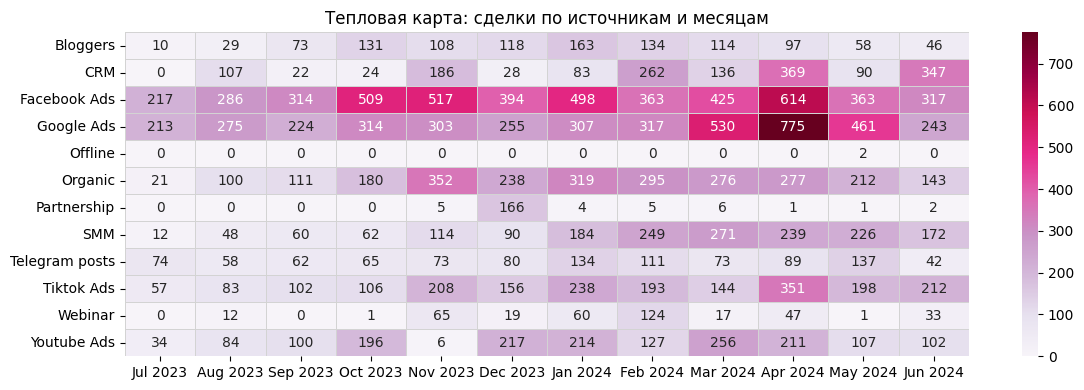

In [34]:
# --- Тепловая карта по источникам ---
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_source, annot=True, fmt="d", cmap="PuRd", linewidths=0.5, linecolor='lightgrey')
plt.title("Тепловая карта: сделки по источникам и месяцам")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



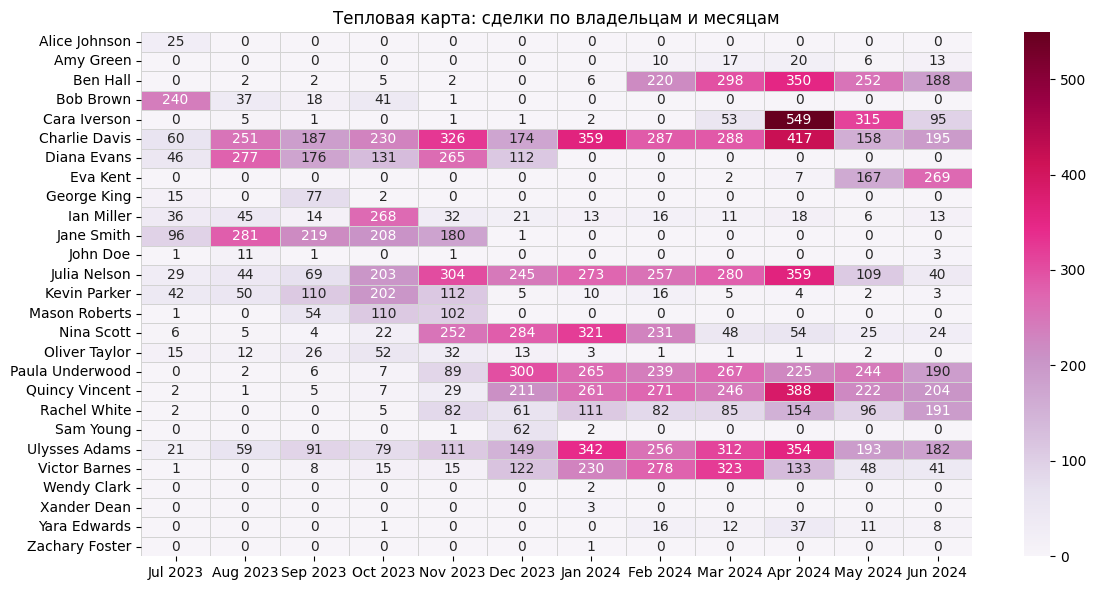

In [35]:
# --- Тепловая карта по владельцам ---
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_owner, annot=True, fmt="d", cmap="PuRd", linewidths=0.5, linecolor='lightgrey')
plt.title("Тепловая карта: сделки по владельцам и месяцам")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
# Расчёт продолжительности сделки (в днях)
deals_contacts['Days_to_Close'] = (deals_contacts['Closing Date'] - deals_contacts['Created Time_deals']).dt.days

# Фильтрация: только валидные значения (не NaN и >= 0)
valid_durations = deals_contacts['Days_to_Close'].dropna()
valid_durations = valid_durations[valid_durations >= 0]

# Описательная статистика
duration_stats = valid_durations.describe()
duration_stats

count    11253.000000
mean        18.228028
std         34.356458
min          0.000000
25%          1.000000
50%          5.000000
75%         16.000000
max        304.000000
Name: Days_to_Close, dtype: float64

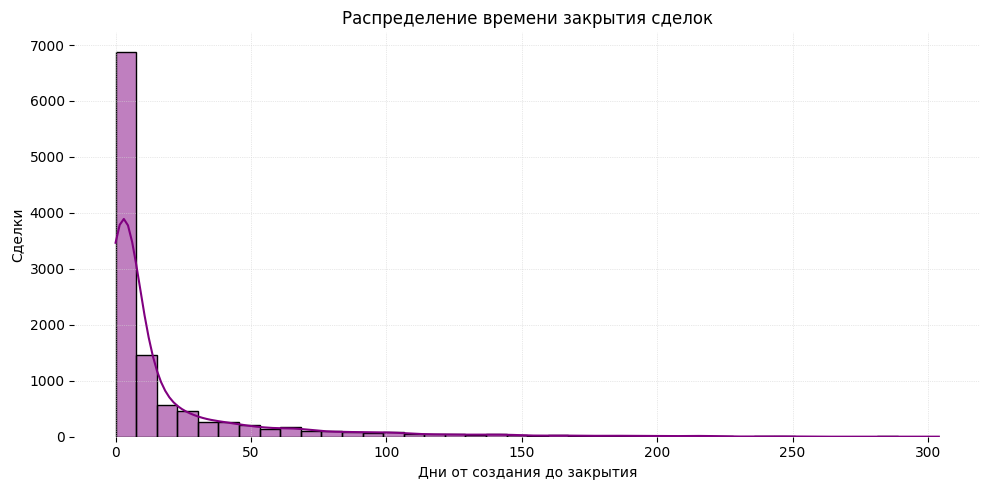

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(valid_durations, bins=40, kde=True, color='purple', edgecolor='black')
plt.title("Распределение времени закрытия сделок")
plt.xlabel("Дни от создания до закрытия")
plt.ylabel("Сделки")

# Убираем границы
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.grid('x', color='lightgrey', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


<Figure size 2000x1500 with 0 Axes>

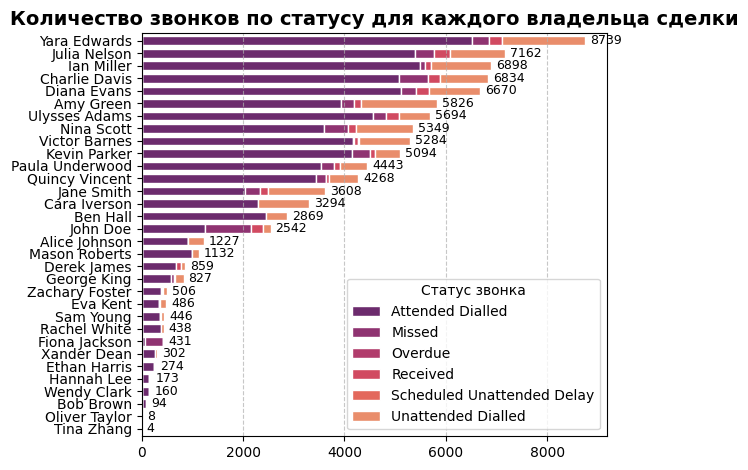

In [38]:
# Сортировка по сумме звонков (по убыванию)
call_status_counts_sorted = call_status_counts.copy()
call_status_counts_sorted['Total'] = call_status_counts.sum(axis=1)
call_status_counts_sorted = call_status_counts_sorted.sort_values(by='Total', ascending=True).drop(columns='Total')

# Палитра из flare_r
colors = sns.color_palette("flare_r", n_colors=call_status_counts_sorted.shape[1])

# Построение графика
plt.figure(figsize=(20, 15))
ax = call_status_counts_sorted.plot(
    kind='barh',
    stacked=True,
    color=colors,
    edgecolor='white',
    width=0.7
)

# Добавляем только одну общую подпись справа от каждой строки
totals = call_status_counts_sorted.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(total + 100, i, str(int(total)), va='center', fontsize=9)

# Заголовки и стиль
plt.title('Количество звонков по статусу для каждого владельца сделки', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Статус звонка', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **# Анализ Эффективности компаний**

1. Сравните эффективность различных компаний с точки зрения генерации лидов и коэфицента конверсии

2. Оцените эффективность различных маркетинговых источников (Source) в генерировании качественных лидов

In [39]:
import re

def clean_campaign_name(name):
    name = str(name).strip().lower()
    # удаляем всё до первой буквы (включая цифры, точки, подчеркивания и префиксы)
    cleaned = re.sub(r"^[^a-zA-Z]*", "", name)
    return cleaned

# Применим к столбцу
deals_spend["Campaign Cleaned"] = deals_spend["Campaign"].apply(clean_campaign_name)

# Посмотрим примеры
deals_spend[["Campaign", "Campaign Cleaned"]].drop_duplicates().head(10)

Campaign       Campaign Cleaned
0              03.07.23women                  women
1                No campaign            no campaign
2                 engwien_AT             engwien_at
3   04.07.23recentlymoved_DE       recentlymoved_de
4               discovery_DE           discovery_de
5          youtube_shorts_DE      youtube_shorts_de
7        brand_search_eng_DE    brand_search_eng_de
9                  1406start                  start
15      20.05.24interests_DE           interests_de
17     performancemax_eng_DE  performancemax_eng_de

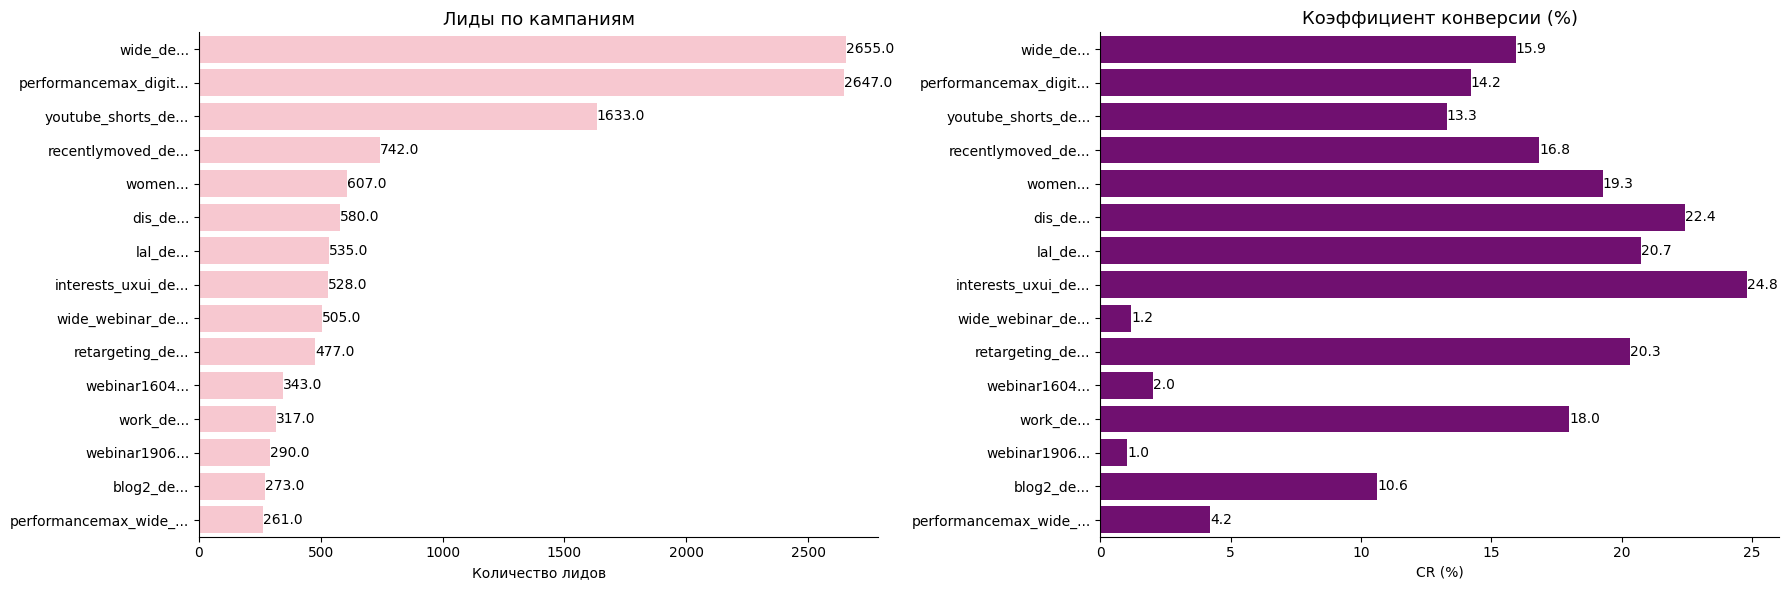

In [40]:
# Фильтрация данных: исключаем "No campaign"
deals_spend_filtered = deals_spend[deals_spend['Campaign Cleaned'] != 'no campaign']

# 1. Подсчет количества лидов по кампаниям
leads_per_campaign = deals_spend_filtered.groupby('Campaign Cleaned').size().reset_index(name='num_leads')

# 2. Подсчет количества успешных сделок
conversions_per_campaign = (
    deals_spend[deals_spend['Stage'] == 'Payment Done']
    .groupby('Campaign Cleaned')
    .size()
    .reset_index(name='num_conversions')
)

# 3. Подсчет коэффициента конверсии
conversion_rate = conversions_per_campaign.merge(leads_per_campaign, on='Campaign Cleaned')
conversion_rate['conversion_rate'] = (conversion_rate['num_conversions'] / conversion_rate['num_leads']) * 100

# 4. Подсчет затрат по кампаниям и расчёт CPL и CPA
campaign_spend = deals_spend.groupby('Campaign Cleaned')['Spend'].sum().reset_index()
campaign_efficiency = conversion_rate.merge(campaign_spend, on='Campaign Cleaned')

# Расчёт стоимости лида и конверсии
campaign_efficiency['CPL'] = campaign_efficiency['Spend'] / campaign_efficiency['num_leads']
campaign_efficiency['CPA'] = campaign_efficiency['Spend'] / campaign_efficiency['num_conversions']

# Оставим топ-15 по числу лидов
campaign_efficiency_sorted = campaign_efficiency.sort_values(by='num_leads', ascending=False).head(15).copy()
campaign_efficiency_sorted['Short Campaign'] = campaign_efficiency_sorted['Campaign Cleaned'].str[:20] + '...'

# Построение сравнения лидов и конверсии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# График 1: лиды по кампаниям
sns.barplot(
    data=campaign_efficiency_sorted,
    x='num_leads',
    y='Short Campaign',
    ax=axes[0],
    color='pink'
)
axes[0].set_title('Лиды по кампаниям', fontsize=13)
axes[0].set_xlabel('Количество лидов')
axes[0].set_ylabel('')

# График 2: конверсия по кампаниям
sns.barplot(
    data=campaign_efficiency_sorted,
    x='conversion_rate',
    y='Short Campaign',
    ax=axes[1],
    color='purple'
)
axes[1].set_title('Коэффициент конверсии (%)', fontsize=13)
axes[1].set_xlabel('CR (%)')
axes[1].set_ylabel('')

# Подписи на столбцах
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=10, label_type='edge')

# Удаление рамок
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


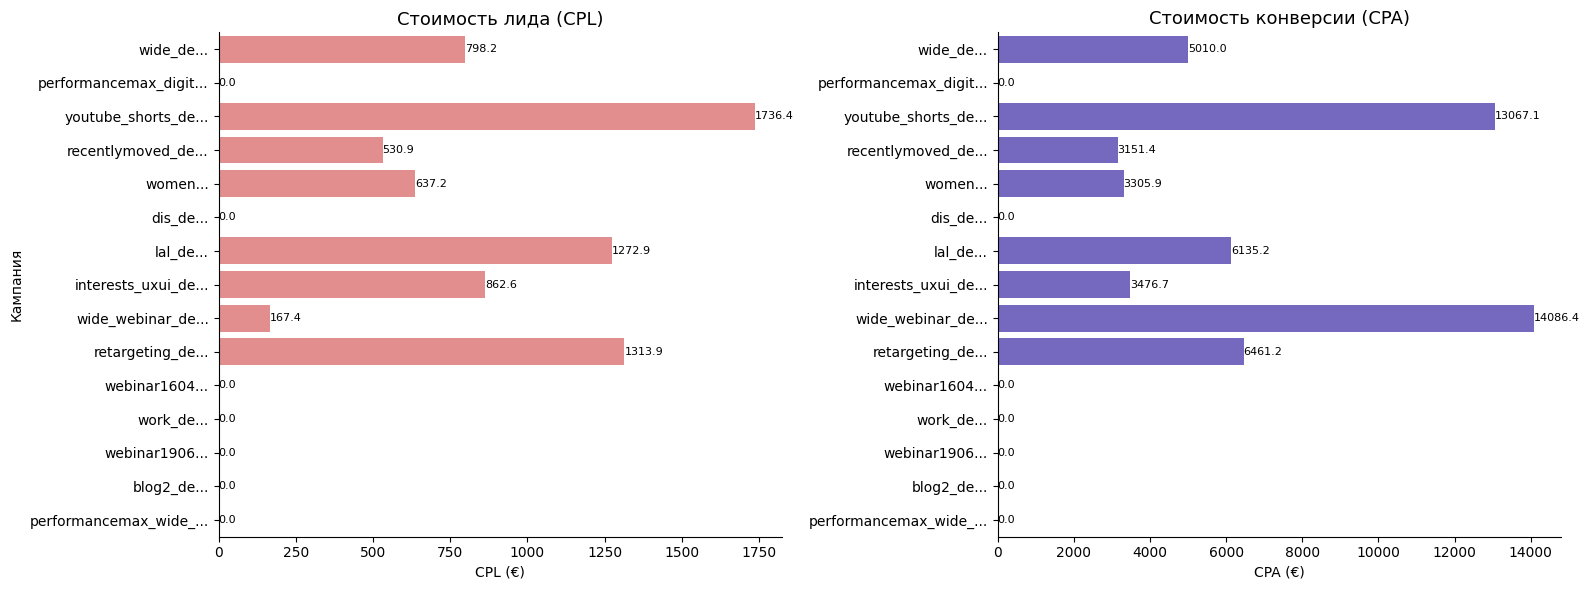

In [41]:
# Построим горизонтальные графики CPL и CPA по топ-15 кампаниям

# Используем те же отсортированные данные, что и ранее
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# График 1: CPL (стоимость лида)
sns.barplot(
    data=campaign_efficiency_sorted,
    x='CPL',
    y='Short Campaign',
    ax=axes[0],
    color='lightcoral'
)
axes[0].set_title('Стоимость лида (CPL)', fontsize=13)
axes[0].set_xlabel('CPL (€)')
axes[0].set_ylabel('Кампания')

# График 2: CPA (стоимость привлечения клиента)
sns.barplot(
    data=campaign_efficiency_sorted,
    x='CPA',
    y='Short Campaign',
    ax=axes[1],
    color='slateblue'
)
axes[1].set_title('Стоимость конверсии (CPA)', fontsize=13)
axes[1].set_xlabel('CPA (€)')
axes[1].set_ylabel('')

# Подписи на столбцах
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=8, label_type='edge')

# Убираем рамки
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


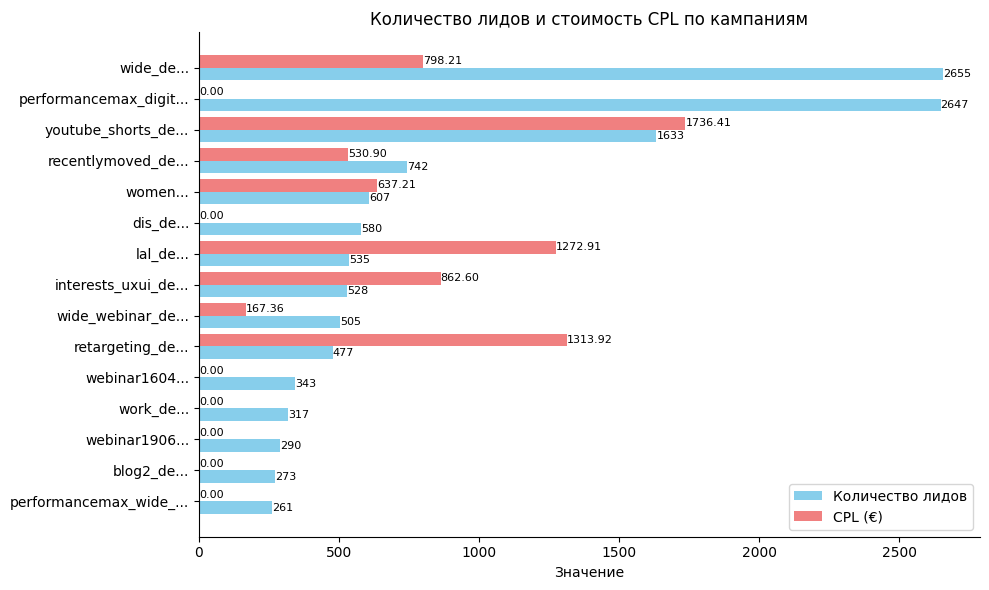

In [42]:
campaign_efficiency_sorted = campaign_efficiency_sorted.sort_values(by='num_leads', ascending=True)  # для горизонтального barplot

# Подготовка данных
x = np.arange(len(campaign_efficiency_sorted))  # позиции кампаний
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Столбцы: количество лидов
bars1 = ax.barh(y=x - width/2, width=campaign_efficiency_sorted['num_leads'], height=width, label='Количество лидов', color='skyblue')

# Столбцы: CPL
bars2 = ax.barh(y=x + width/2, width=campaign_efficiency_sorted['CPL'], height=width, label='CPL (€)', color='lightcoral')

# Настройки осей и меток
ax.set_yticks(x)
ax.set_yticklabels(campaign_efficiency_sorted['Short Campaign'])
ax.set_xlabel('Значение')
ax.set_title('Количество лидов и стоимость CPL по кампаниям')
ax.legend()

# Подписи на столбцах
ax.bar_label(bars1, fmt='%.0f', fontsize=8, label_type='edge')
ax.bar_label(bars2, fmt='%.2f', fontsize=8, label_type='edge')

# Убираем рамки
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


<ipython-input-43-daa5107024aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


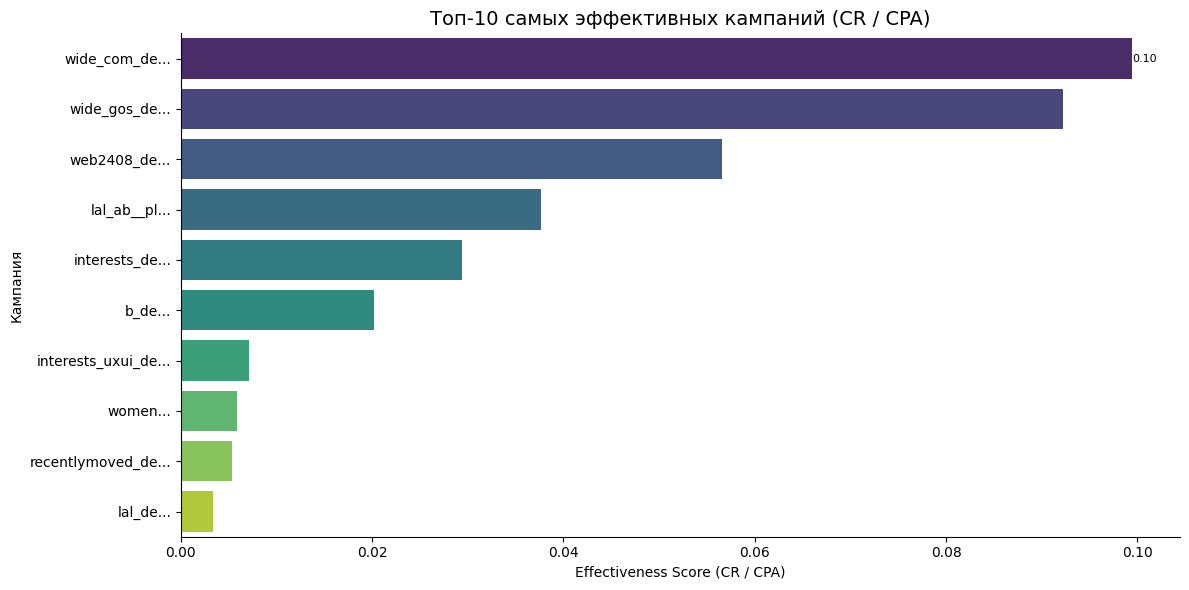

In [43]:
# Добавим фильтр: только кампании с ненулевым CPA и CPL (реальные затраты)
valid_campaigns = campaign_efficiency[
    (campaign_efficiency['CPA'] > 0) &
    (campaign_efficiency['CPL'] > 0)
].copy()

# Вычислим эффективность: CR / CPA
valid_campaigns['Effectiveness Score'] = valid_campaigns['conversion_rate'] / valid_campaigns['CPA']

# Топ-10 самых эффективных кампаний
top_successful_campaigns = valid_campaigns.sort_values(by='Effectiveness Score', ascending=False).head(10).copy()
top_successful_campaigns['Short Campaign'] = top_successful_campaigns['Campaign Cleaned'].str[:25] + '...'

# Построим горизонтальный барплот
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_successful_campaigns,
    y='Short Campaign',
    x='Effectiveness Score',
    palette='viridis'
)
ax.set_title('Топ-10 самых эффективных кампаний (CR / CPA)', fontsize=14)
ax.set_xlabel('Effectiveness Score (CR / CPA)')
ax.set_ylabel('Кампания')
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=8, label_type='edge')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


     Campaign Cleaned  num_leads  num_conversions  conversion_rate  \
0            akademia          5                1        20.000000   
1     anastasia_de_de         49                2         4.081633   
2            arina_de         23                6        26.086957   
3           asa_de_de        112               25        22.321429   
4       aussiedler_de          6                2        33.333333   
..                ...        ...              ...              ...   
79              women        607              117        19.275124   
80            work_de        317               57        17.981073   
81       workingin_de         48                4         8.333333   
82              yo_de         13                1         7.692308   
83  youtube_shorts_de       1633              217        13.288426   

            CPL           CPA  
0      0.000000      0.000000  
1      0.000000      0.000000  
2      0.000000      0.000000  
3      0.000000      0.000000  

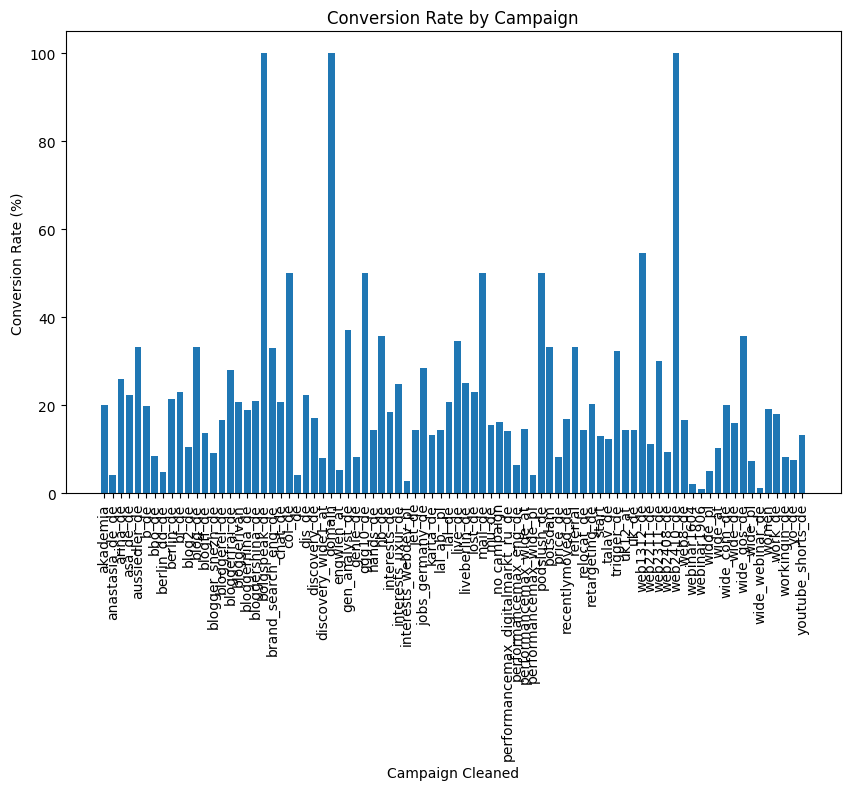

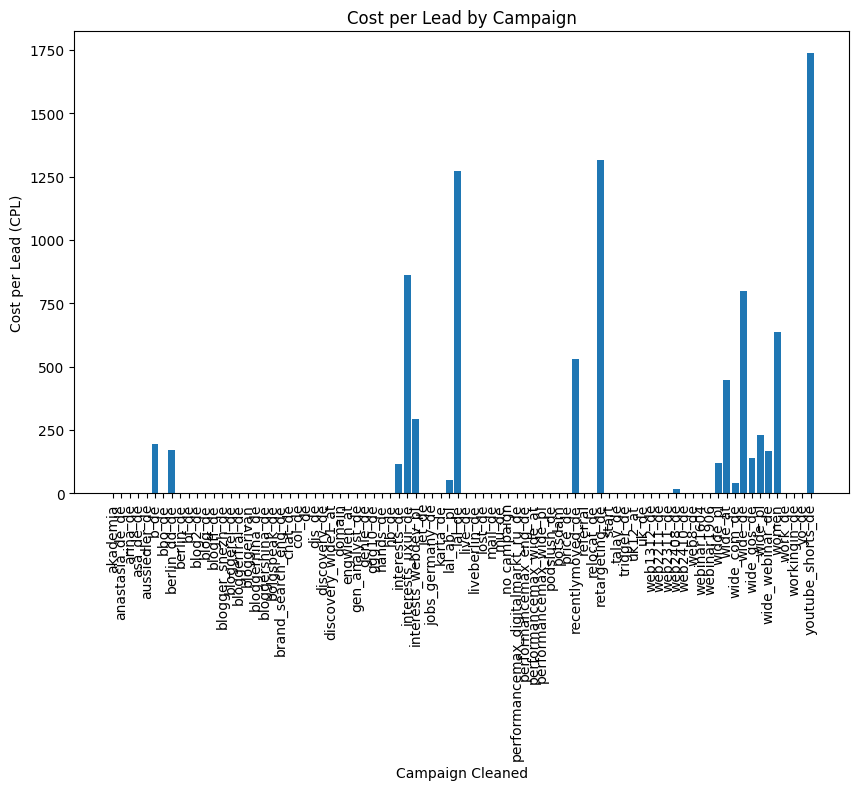

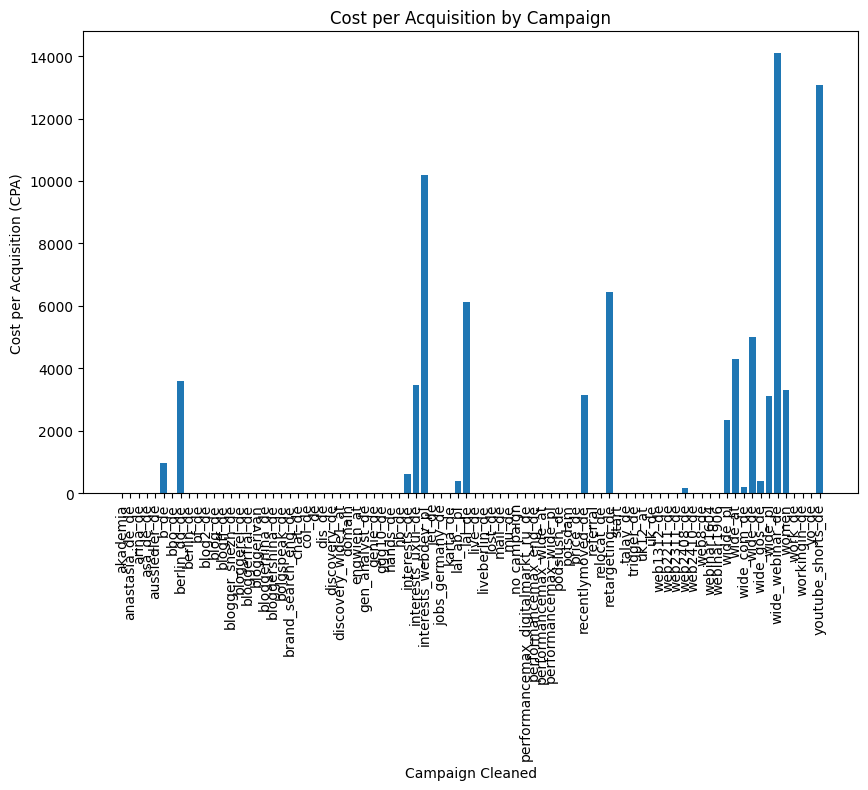

In [44]:
# 1. Подсчет количества лидов по кампаниям
leads_per_campaign = deals_spend.groupby('Campaign Cleaned').size().reset_index(name='num_leads')

# 2. Подсчет количества закрытых сделок (конверсий)
conversions_per_campaign = deals_spend[deals_spend['Stage'] == 'Payment Done'].groupby('Campaign Cleaned').size().reset_index(name='num_conversions')

# 3. Подсчет коэффициента конверсии
conversion_rate = conversions_per_campaign.merge(leads_per_campaign, on='Campaign Cleaned')
conversion_rate['conversion_rate'] = (conversion_rate['num_conversions'] / conversion_rate['num_leads']) * 100

# 4. Подсчет затрат на кампании и расчет CPL и CPA
campaign_spend = deals_spend.groupby('Campaign Cleaned')['Spend'].sum().reset_index()
campaign_efficiency = conversion_rate.merge(campaign_spend, on='Campaign Cleaned')

# Расчет стоимости лида (CPL) и стоимости конверсии (CPA)
campaign_efficiency['CPL'] = campaign_efficiency['Spend'] / campaign_efficiency['num_leads']
campaign_efficiency['CPA'] = campaign_efficiency['Spend'] / campaign_efficiency['num_conversions']

# 5. Анализ данных
# Выводим результат для анализа
print(campaign_efficiency[['Campaign Cleaned', 'num_leads', 'num_conversions', 'conversion_rate', 'CPL', 'CPA']])

# График коэффициента конверсии по кампаниям
plt.figure(figsize=(10,6))
plt.bar(campaign_efficiency['Campaign Cleaned'], campaign_efficiency['conversion_rate'])
plt.xlabel('Campaign Cleaned')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Campaign')
plt.xticks(rotation=90)
plt.show()

# График стоимости лида по кампаниям
plt.figure(figsize=(10,6))
plt.bar(campaign_efficiency['Campaign Cleaned'], campaign_efficiency['CPL'])
plt.xlabel('Campaign Cleaned')
plt.ylabel('Cost per Lead (CPL)')
plt.title('Cost per Lead by Campaign')
plt.xticks(rotation=90)
plt.show()

# График стоимости конверсии по кампаниям
plt.figure(figsize=(10,6))
plt.bar(campaign_efficiency['Campaign Cleaned'], campaign_efficiency['CPA'])
plt.xlabel('Campaign Cleaned')
plt.ylabel('Cost per Acquisition (CPA)')
plt.title('Cost per Acquisition by Campaign')
plt.xticks(rotation=90)
plt.show()

In [45]:
deals_spend['Campaign Cleaned'].value_counts().sum()

np.int64(21291)

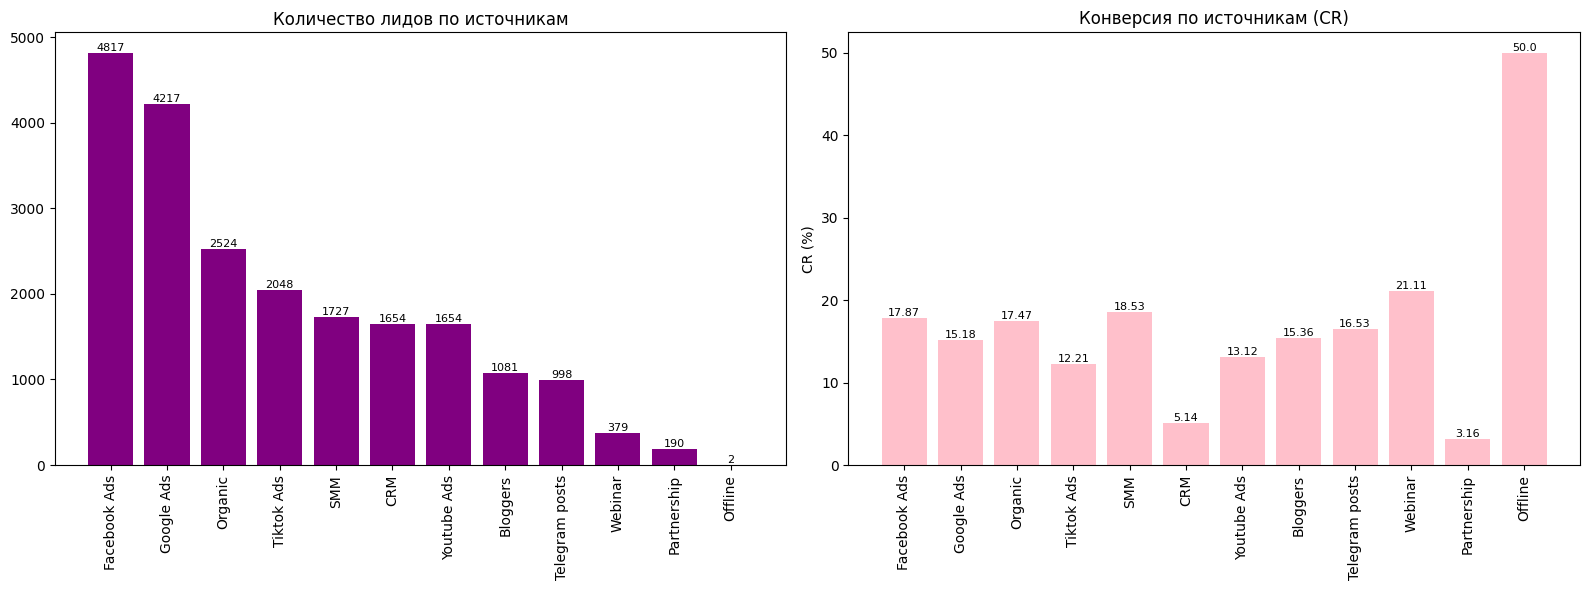

In [46]:
# Подготовим таблицу campaign_summary с нужными столбцами
# Группируем по источнику
campaign_summary = deals_spend.groupby("Source").agg({
    "Contact Name": "count",
    "Stage": lambda x: (x == "Payment Done").sum(),
    "Impressions": "sum",
    "Clicks": "sum",
    "Spend": "sum"
}).reset_index()

# Переименование столбцов для читаемости
campaign_summary.columns = ["Source", "Leads", "Is Successful", "Impressions", "Clicks", "Spend"]

# Вычисляем метрики
campaign_summary['CR'] = (campaign_summary['Is Successful'] / campaign_summary['Leads']) * 100
campaign_summary['CTR'] = (campaign_summary['Clicks'] / campaign_summary['Impressions']) * 100
campaign_summary['CPC'] = campaign_summary['Spend'] / campaign_summary['Clicks']
campaign_summary['CPL'] = campaign_summary['Spend'] / campaign_summary['Leads']

# Округляем значения
campaign_summary['CR'] = campaign_summary['CR'].round(2)
campaign_summary['CTR'] = campaign_summary['CTR'].round(2)

# Сортировка по количеству лидов
campaign_summary_sorted = campaign_summary.sort_values(by='Leads', ascending=False)

# Построение графиков
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

# График 1: Количество лидов по источникам
axes[0].bar(campaign_summary_sorted['Source'], campaign_summary_sorted['Leads'], color='purple')
axes[0].set_title('Количество лидов по источникам')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=90)
for container in axes[0].containers:
    axes[0].bar_label(container, labels=campaign_summary_sorted['Leads'], fontsize=8, color='black')

# График 2: Конверсия (CR) по источникам
axes[1].bar(campaign_summary_sorted['Source'], campaign_summary_sorted['CR'], color='pink')
axes[1].set_title('Конверсия по источникам (CR)')
axes[1].set_xlabel('')
axes[1].set_ylabel('CR (%)')
axes[1].tick_params(axis='x', rotation=90)
for container in axes[1].containers:
    axes[1].bar_label(container, labels=campaign_summary_sorted['CR'], fontsize=8, color='black')



plt.tight_layout()
plt.show()


<ipython-input-47-532cedaf8a16>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(campaign_summary_sorted['Source'], rotation=0)


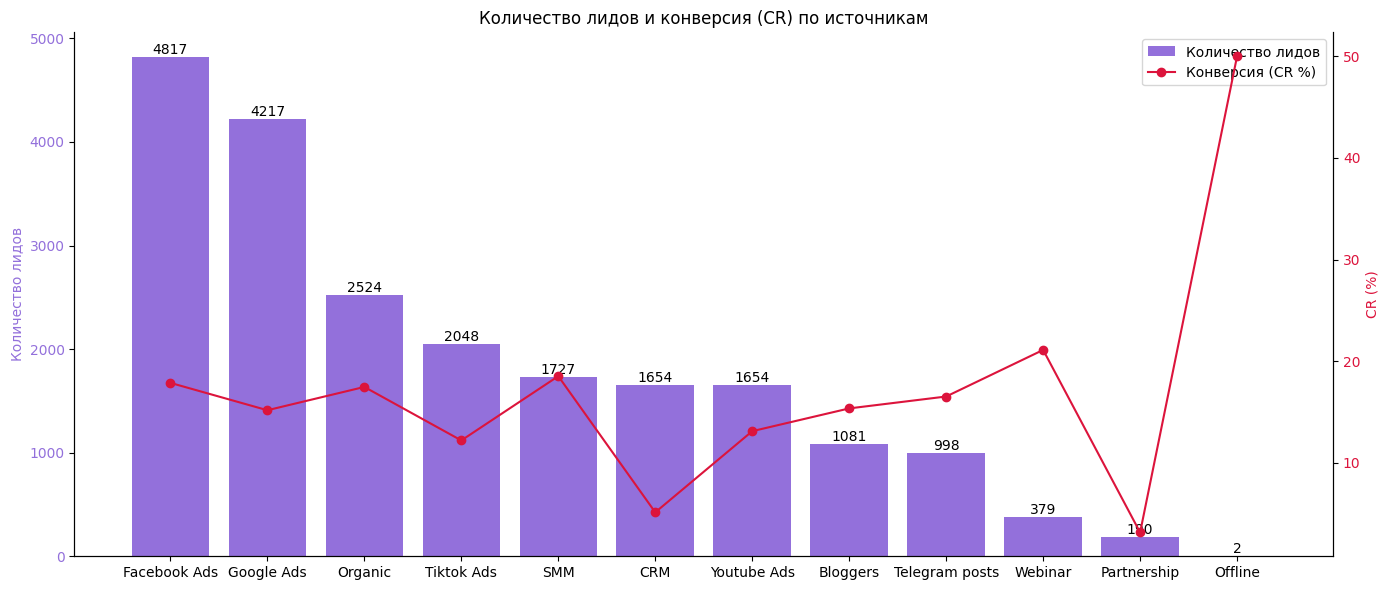

In [47]:
# Построим график: количество лидов и CR по источникам
campaign_summary = deals_spend.groupby("Source").agg({
    "Contact Name": "count",
    "Stage": lambda x: (x == "Payment Done").sum(),
    "Impressions": "sum",
    "Clicks": "sum",
    "Spend": "sum"
}).reset_index()

campaign_summary.columns = ["Source", "Leads", "Is Successful", "Impressions", "Clicks", "Spend"]

# Метрики
campaign_summary['CR'] = (campaign_summary['Is Successful'] / campaign_summary['Leads']) * 100
campaign_summary['CTR'] = (campaign_summary['Clicks'] / campaign_summary['Impressions']) * 100
campaign_summary['CPC'] = campaign_summary['Spend'] / campaign_summary['Clicks']
campaign_summary['CPL'] = campaign_summary['Spend'] / campaign_summary['Leads']

# Округления
campaign_summary['CR'] = campaign_summary['CR'].round(2)
campaign_summary['CTR'] = campaign_summary['CTR'].round(2)

# Сортировка
campaign_summary_sorted = campaign_summary.sort_values(by='Leads', ascending=False)

# Построение графика: столбцы + линия
fig, ax1 = plt.subplots(figsize=(14, 6))

bars = ax1.bar(
    campaign_summary_sorted['Source'],
    campaign_summary_sorted['Leads'],
    color='mediumpurple',
    label='Количество лидов'
)
ax1.set_ylabel('Количество лидов', color='mediumpurple')
ax1.tick_params(axis='y', labelcolor='mediumpurple')
ax1.set_xticklabels(campaign_summary_sorted['Source'], rotation=0)
ax1.set_title('Количество лидов и конверсия (CR) по источникам')
ax1.bar_label(bars, labels=campaign_summary_sorted['Leads'], fontsize=10)

# Вторая ось: линия CR
ax2 = ax1.twinx()
line = ax2.plot(
    campaign_summary_sorted['Source'],
    campaign_summary_sorted['CR'],
    color='crimson',
    marker='o',
    label='Конверсия (CR %)'
)
ax2.set_ylabel('CR (%)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Легенда
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper right')
sns.despine(top=True, right=False)

plt.tight_layout()
plt.show()


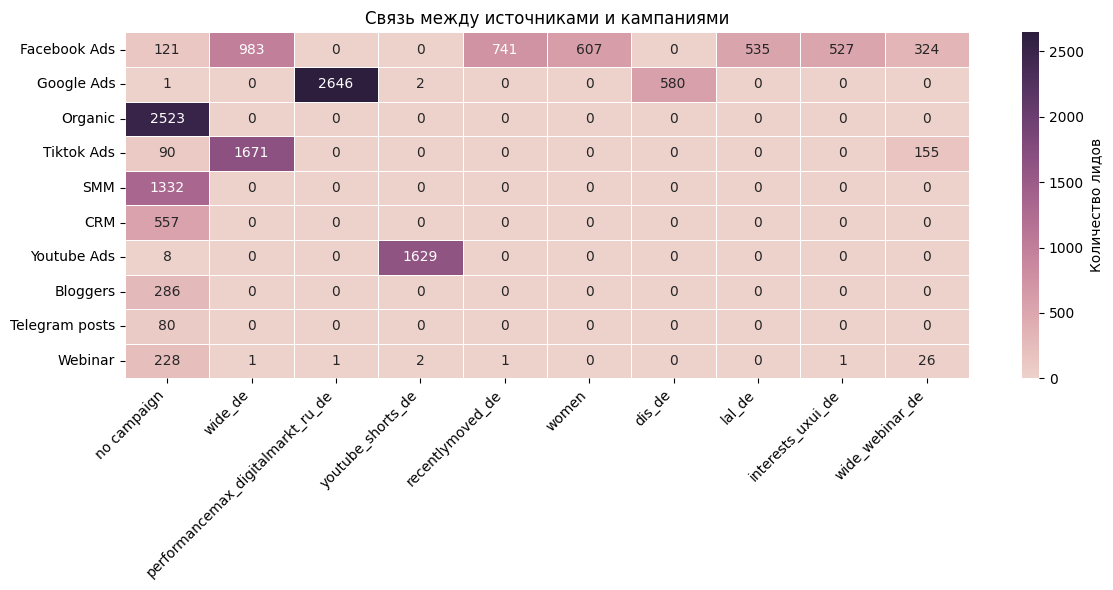

In [48]:
# Построим кросс-таблицу: количество лидов по источнику и кампании
source_campaign_matrix = deals_spend.pivot_table(
    index="Source",
    columns="Campaign Cleaned",
    values="Id",
    aggfunc="count",
    fill_value=0
)

# Оставим только источники и кампании с наибольшим количеством данных (топ-10 и топ-10)
top_sources = source_campaign_matrix.sum(axis=1).nlargest(10).index
top_campaigns = source_campaign_matrix.sum(axis=0).nlargest(10).index

# Отфильтруем матрицу
filtered_matrix = source_campaign_matrix.loc[top_sources, top_campaigns]

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_matrix, annot=True, fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, cbar_kws={'label': 'Количество лидов'})
plt.title("Связь между источниками и кампаниями")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


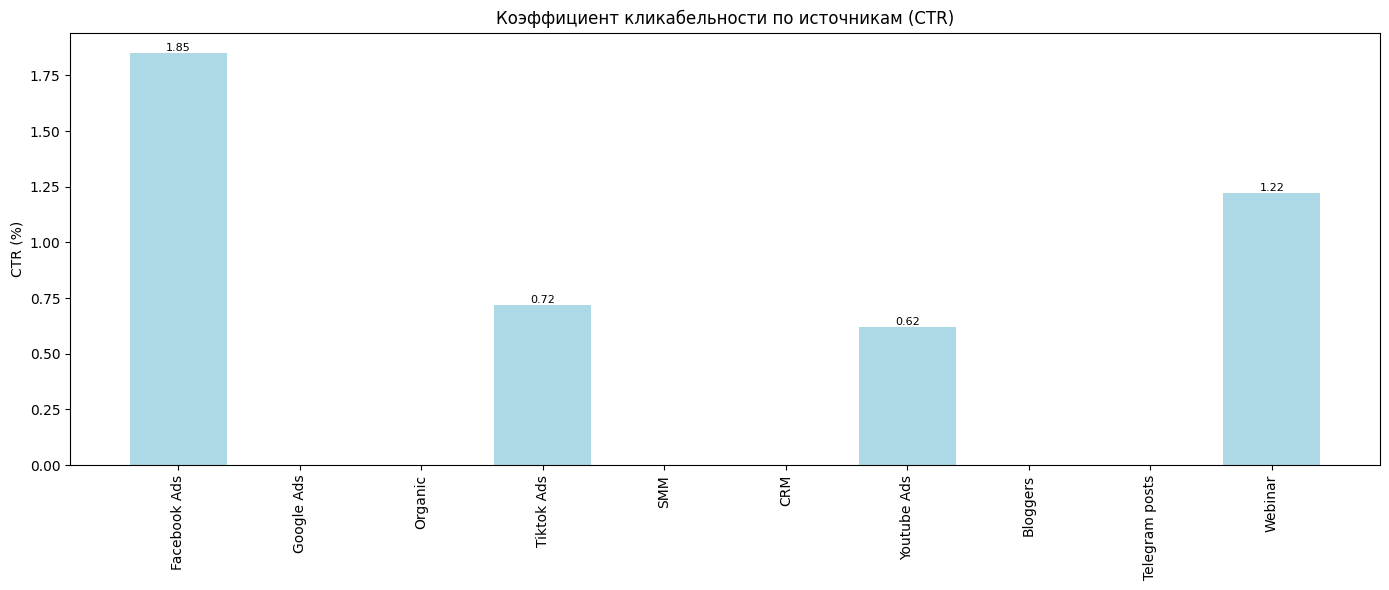

In [49]:
# Отдельный график: CTR
plt.figure(figsize=(14, 6))
plt.bar(campaign_summary_sorted['Source'], campaign_summary_sorted['CTR'], color='lightblue')
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', labels=campaign_summary_sorted['CTR'], fontsize=8, color='black')

plt.title('Коэффициент кликабельности по источникам (CTR)')
plt.xlabel('')
plt.ylabel('CTR (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
#  Классификация лидов по качеству
positive_stages = ['Waiting For Payment', 'Payment Done']
deals_spend['is_quality_lead'] = deals_spend['Stage'].isin(positive_stages).astype(int)

# Подсчет общего количества лидов по источникам
total_leads_per_source = deals_spend.groupby('Source').size().reset_index(name='total_leads')

# Подсчет количества качественных лидов по источникам
quality_leads_per_source = deals_spend[deals_spend['is_quality_lead'] == 1].groupby('Source').size().reset_index(name='quality_leads')

# Расчет коэффициента качества лидов по источникам
lead_quality = quality_leads_per_source.merge(total_leads_per_source, on='Source')
lead_quality['quality_rate'] = ((lead_quality['quality_leads'] / lead_quality['total_leads']) * 100).round(2)

# Анализ данных

# Формируем таблицу для вывода
table = lead_quality[['Source', 'total_leads', 'quality_leads', 'quality_rate']]
table.columns = ['Source', 'Total Leads', 'Quality Leads', 'Quality Rate (%)']

# Печатаем таблицу с использованием
display(table)

Source  Total Leads  Quality Leads  Quality Rate (%)
0         Bloggers         1081            166             15.36
1              CRM         1654             85              5.14
2     Facebook Ads         4817            863             17.92
3       Google Ads         4217            640             15.18
4          Offline            2              1             50.00
5          Organic         2524            442             17.51
6      Partnership          190              6              3.16
7              SMM         1727            320             18.53
8   Telegram posts          998            165             16.53
9       Tiktok Ads         2048            250             12.21
10         Webinar          379             81             21.37
11     Youtube Ads         1654            217             13.12

# **# Анализ эффективности работы отдела продаж:**
Оцените эффективность отдельных владельцев сделок и рекламных кампаний с точки зрения количества обработанных сделок, коэффициента конверсии и общей суммы продаж.

Много разных графиков, по разному можно оценивать, для презентации взяла несколько

In [51]:
# 1. Подсчет количества обработанных сделок по владельцам сделок и рекламным кампаниям
deals_count = deals_spend.groupby(['Deal Owner Name', 'Campaign Cleaned']).size().reset_index(name='total_deals')

# 2. Подсчет количества успешных сделок и расчет коэффициента конверсии
successful_deals = deals_spend[deals_spend['Stage'].isin(['Waiting For Payment', 'Payment Done'])]
conversion_rate = successful_deals.groupby(['Deal Owner Name', 'Campaign Cleaned']).size().reset_index(name='successful_deals')
conversion_rate = pd.merge(deals_count, conversion_rate, on=['Deal Owner Name', 'Campaign Cleaned'], how='left').fillna(0)
conversion_rate['conversion_rate'] = (conversion_rate['successful_deals'] / conversion_rate['total_deals']) * 100

# 3. Подсчет общей суммы продаж по владельцам сделок и рекламным кампаниям
sales_sum = successful_deals.groupby(['Deal Owner Name', 'Campaign Cleaned'])['Offer Total Amount'].sum().reset_index(name='total_sales')

# Объединение всех метрик в одну таблицу для анализа
final_analysis = pd.merge(conversion_rate, sales_sum, on=['Deal Owner Name', 'Campaign Cleaned'], how='left').fillna(0)

# Фильтрация строк, чтобы оставить только ненулевые значения в ключевых столбцах
filtered_analysis = final_analysis[
    (final_analysis['total_deals'] > 0) &
    (final_analysis['successful_deals'] > 0) &
    (final_analysis['conversion_rate'] > 0) &
    (final_analysis['total_sales'] > 0)
]

# Вывод результатов
display(filtered_analysis[['Deal Owner Name', 'Campaign Cleaned', 'total_deals', 'successful_deals', 'conversion_rate', 'total_sales']])

Deal Owner Name   Campaign Cleaned  total_deals  successful_deals  \
19          Ben Hall    anastasia_de_de           10               1.0   
20          Ben Hall          asa_de_de           11               2.0   
24          Ben Hall          berlin_de            3               1.0   
25          Ben Hall           blog2_de           37               5.0   
28          Ben Hall     bloggerfrai_de            1               1.0   
...              ...                ...          ...               ...   
1021   Victor Barnes            wide_pl            3               1.0   
1022   Victor Barnes    wide_webinar_de            9               1.0   
1023   Victor Barnes              women           41              11.0   
1024   Victor Barnes            work_de           23               4.0   
1026   Victor Barnes  youtube_shorts_de          119              23.0   

      conversion_rate  total_sales  
19          10.000000      11000.0  
20          18.181818      20000.0  
24          33.333333      11000.0  
25          13.513514      44002.9  
28         100.000000      11000.0  
...               ...          ...  
1021        33.333333       2500.0  
1022        11.111111      11000.0  
1023        26.829268     103500.0  
1024        17.391304      30000.0  
1026        19.327731     175500.0  

[467 rows x 6 columns]

<ipython-input-52-9f3eccd9428e>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


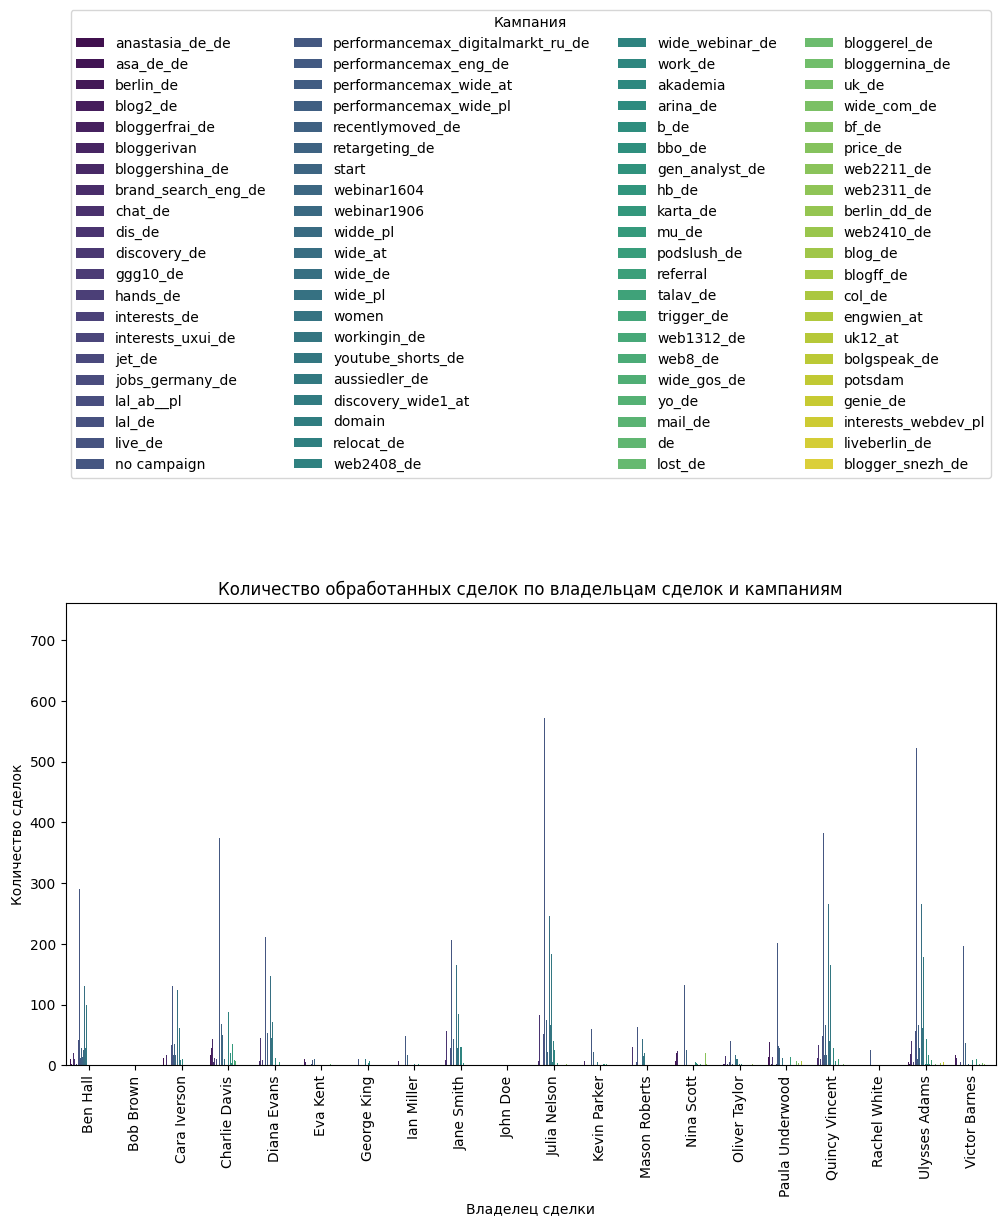

In [52]:
# Визуализация данных

# 1. Количество обработанных сделок по владельцам сделок и кампаниям
plt.figure(figsize=(12, 6))
sns.barplot(x='Deal Owner Name', y='total_deals', hue='Campaign Cleaned', data=filtered_analysis, palette='viridis')
plt.xticks(rotation=90)
plt.title('Количество обработанных сделок по владельцам сделок и кампаниям')
plt.xlabel('Владелец сделки')
plt.ylabel('Количество сделок')
plt.legend(title='Кампания', bbox_to_anchor=(0.5, 2.3), loc='upper center', ncol=4)  # Легенда сверху в один ряд
plt.tight_layout()
plt.show()

<ipython-input-53-3e27dd9792ca>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


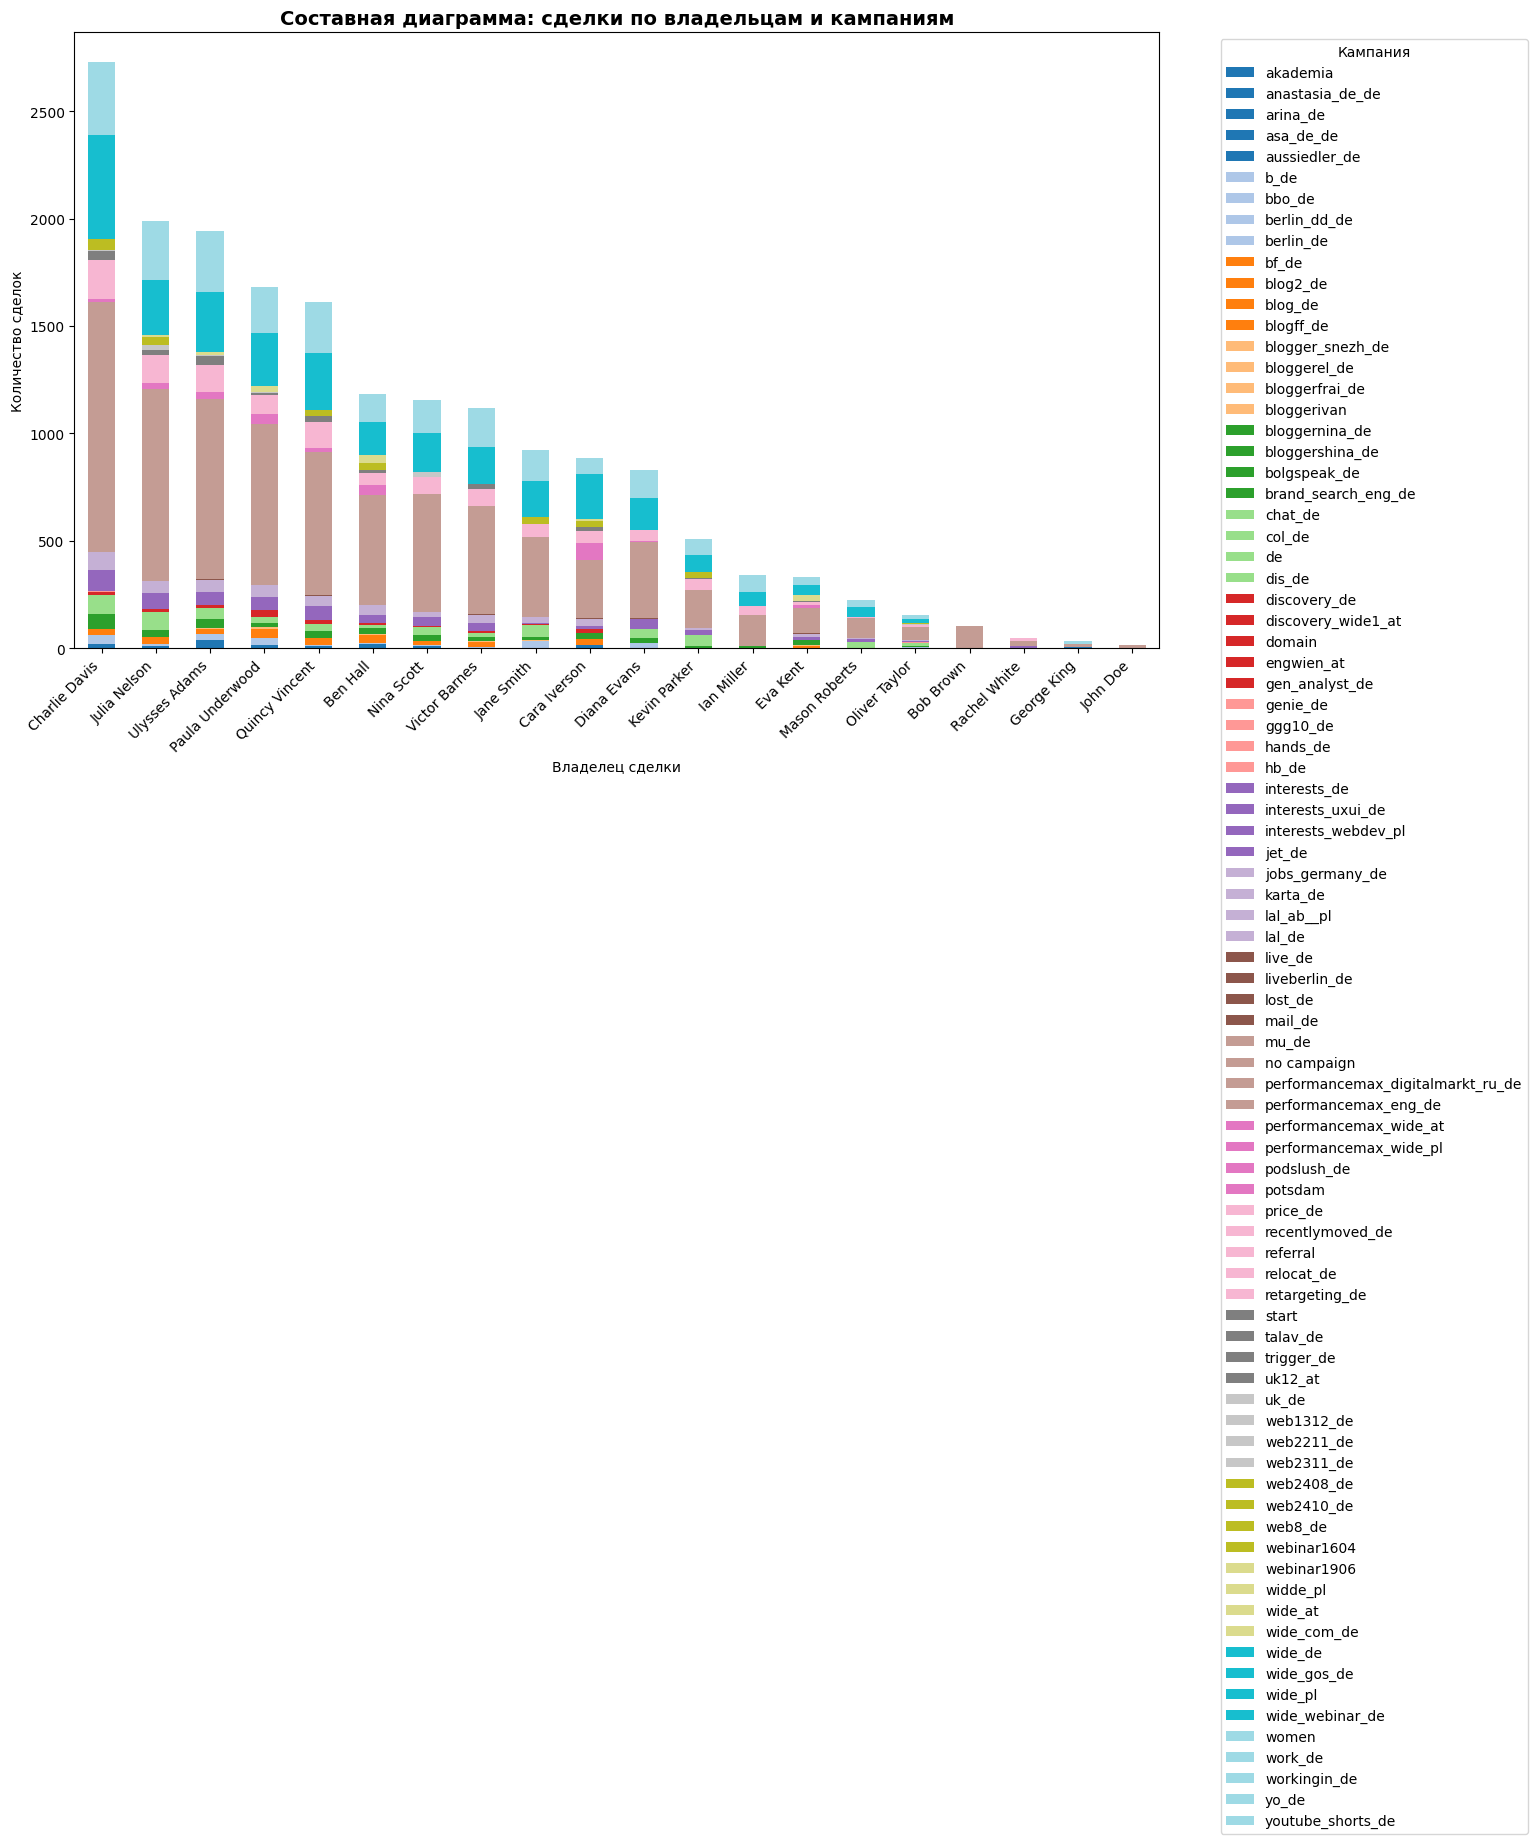

In [53]:

# Пивотируем данные: строки — владельцы, столбцы — кампании, значения — количество сделок
pivot_df = filtered_analysis.pivot_table(
    index='Deal Owner Name',
    columns='Campaign Cleaned',
    values='total_deals',
    aggfunc='sum',
    fill_value=0
)

# Сортировка владельцев по общему количеству сделок
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Построение stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'  # широкая палитра для большого количества кампаний
)

plt.title('Составная диаграмма: сделки по владельцам и кампаниям', fontsize=14, weight='bold')
plt.xlabel('Владелец сделки')
plt.ylabel('Количество сделок')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Кампания', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
deals_spend['Status'] = np.where(deals_spend['Initial Amount Paid'] > 0, 'Successful', 'Unsuccessful')
successful_deals_count = (deals_spend['Status'] == 'Successful').sum()
successful_deals_count

np.int64(3243)

In [55]:
deals_spend['Status'].value_counts()

Status
Unsuccessful    18048
Successful       3243
Name: count, dtype: int64

In [56]:
deals_spend['Is Successful'] = deals_spend['Status'] == 'Successful'

owner_campaigns = deals_spend.groupby(['Deal Owner Name']).agg(
    total_deals=('Status', 'count'),
    successful_deals=('Is Successful', 'sum'),
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
).reset_index()

owner_campaigns['conversion_rate'] = owner_campaigns['successful_deals'] / owner_campaigns['total_deals']
owner_campaigns.head(100)

Deal Owner Name  total_deals  successful_deals  total_sales  \
0     Alice Johnson           25                 0          0.0   
1         Amy Green           66                 0          0.0   
2          Ben Hall         1325               240     236203.5   
3         Bob Brown          337                 2        950.0   
4      Cara Iverson         1022               102     673903.5   
5     Charlie Davis         2932               429     420917.5   
6       Diana Evans         1007                53      50450.0   
7          Eva Kent          445                62      58207.0   
8       George King           94                 4       2900.0   
9        Ian Miller          493                29      29050.0   
10       Jane Smith          985               144     140050.0   
11         John Doe           17                 2       3600.0   
12     Julia Nelson         2212               388     368471.5   
13     Kevin Parker          561                72      68650.0   
14    Mason Roberts          267                21      19300.0   
15       Nina Scott         1276               214     205150.0   
16    Oliver Taylor          158               153     149153.5   
17  Paula Underwood         1834               321     317253.5   
18   Quincy Vincent         1847               199     217601.0   
19     Rachel White          869                 4      14000.0   
20        Sam Young           65                 0          0.0   
21    Ulysses Adams         2149               560     536850.0   
22    Victor Barnes         1214               244     323107.0   
23      Wendy Clark            2                 0          0.0   
24      Xander Dean            3                 0          0.0   
25     Yara Edwards           85                 0          0.0   
26   Zachary Foster            1                 0          0.0   

    total_offer_amount  conversion_rate  
0                  0.0         0.000000  
1                  0.0         0.000000  
2            2005005.8         0.181132  
3              13500.0         0.005935  
4             901000.0         0.099804  
5            3728220.3         0.146317  
6             562500.0         0.052632  
7             548505.8         0.139326  
8              33500.0         0.042553  
9             255000.0         0.058824  
10           1468500.0         0.146193  
11              7500.0         0.117647  
12           3519722.6         0.175407  
13            692002.9         0.128342  
14            222000.0         0.078652  
15           1937502.9         0.167712  
16           1660500.0         0.968354  
17           2776000.0         0.175027  
18           1748002.9         0.107742  
19             44500.0         0.004603  
20                 0.0         0.000000  
21           5066005.8         0.260586  
22           2146300.0         0.200988  
23                 0.0         0.000000  
24                 0.0         0.000000  
25                 0.0         0.000000  
26                 0.0         0.000000

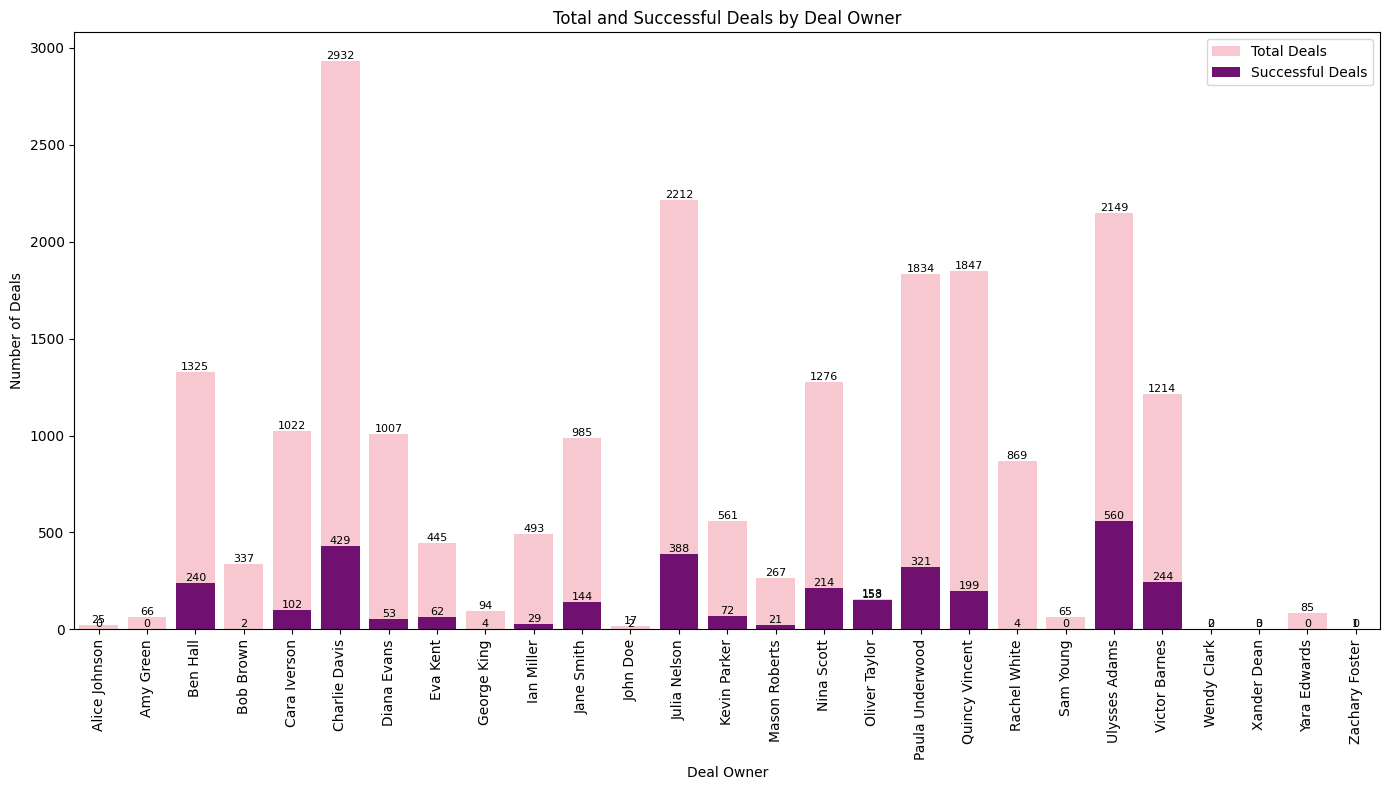

In [57]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Deal Owner Name', y='total_deals', data=owner_campaigns, color='pink', label='Total Deals')
sns.barplot(x='Deal Owner Name', y='successful_deals', data=owner_campaigns, color='purple', label='Successful Deals')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black')

plt.title('Total and Successful Deals by Deal Owner')
plt.xlabel('Deal Owner')
plt.ylabel('Number of Deals')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

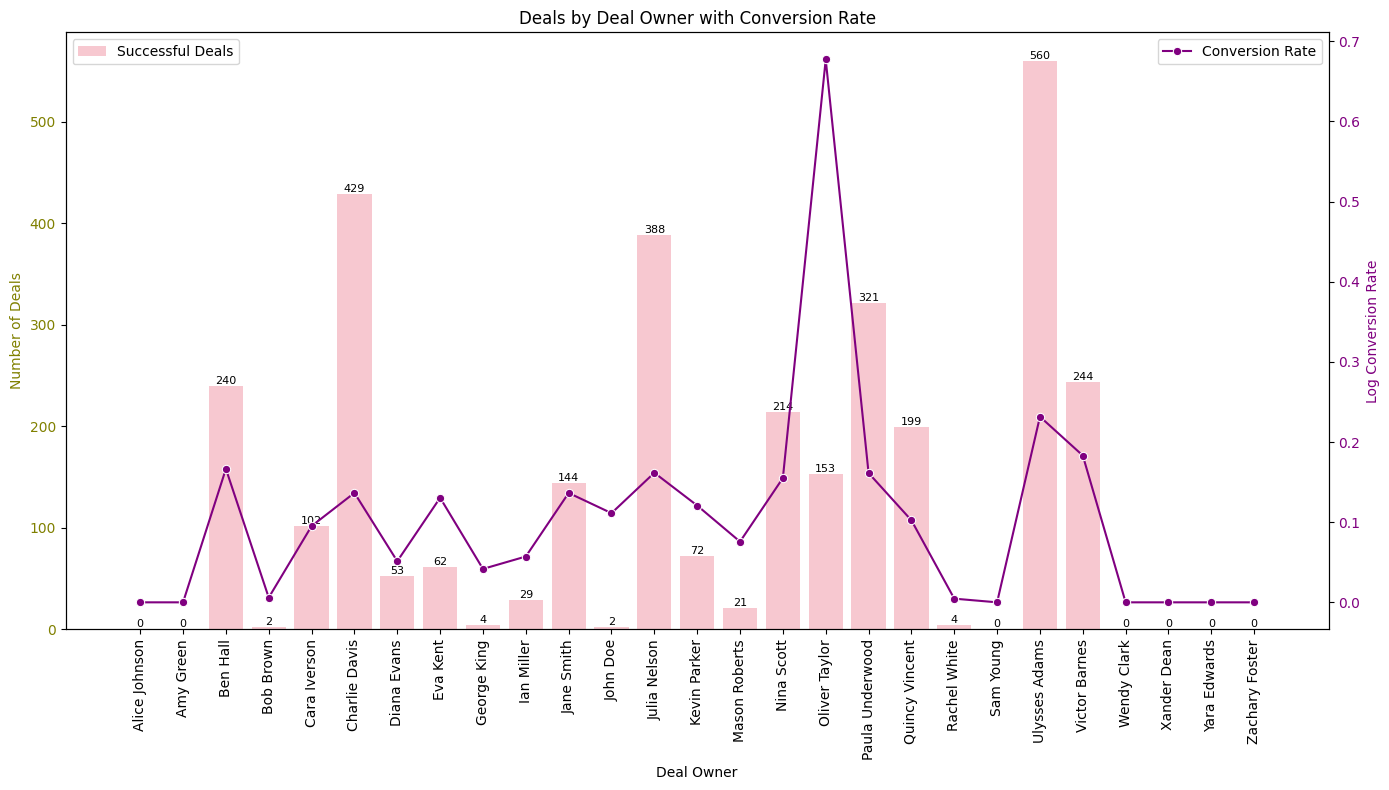

In [58]:
owner_campaigns['log_conversion_rate'] = np.log(owner_campaigns['conversion_rate'] + 1) # Логарифмирую и добавляю 1, чтобы избежать деления на ноль
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(x='Deal Owner Name', y='successful_deals', data=owner_campaigns, color='pink', label='Successful Deals')

ax2 = ax1.twinx()
sns.lineplot(x='Deal Owner Name', y='log_conversion_rate', data=owner_campaigns, marker='o', color='purple', label='Conversion Rate')

for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=8, color='black')

ax2.set_ylabel('Log Conversion Rate', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')


ax1.set_title('Deals by Deal Owner with Conversion Rate')
ax1.set_xlabel('Deal Owner')
ax1.set_ylabel('Number of Deals')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Number of Deals', color='olive')
ax1.tick_params(axis='y', labelcolor='olive')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


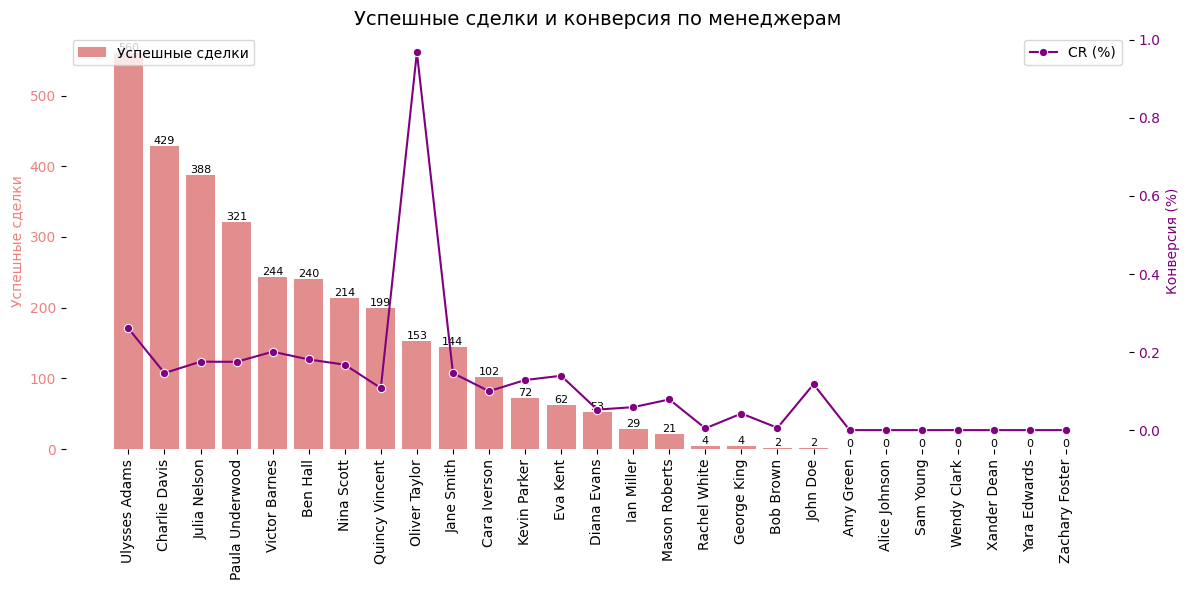

In [59]:
owner_summary = deals_spend.groupby("Deal Owner Name").agg(
    total_deals=("Id", "count"),
    successful_deals=("Is Successful", "sum")
).reset_index()

owner_summary['conversion_rate'] = owner_summary['successful_deals'] / owner_summary['total_deals']

# Сортировка по успешным сделкам
owner_summary_sorted = owner_summary.sort_values(by="successful_deals", ascending=False)

# Построение графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбцы: успешные сделки
sns.barplot(
    x="Deal Owner Name",
    y="successful_deals",
    data=owner_summary_sorted,
    color="lightcoral",
    ax=ax1,
    label="Успешные сделки"
)

# Линия: обычный CR (%)
ax2 = ax1.twinx()
sns.lineplot(
    x="Deal Owner Name",
    y="conversion_rate",
    data=owner_summary_sorted,
    marker='o',
    color="purple",
    ax=ax2,
    label="CR (%)"
)

# Подписи к столбцам
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=8, color='black')

# Удаляем рамки графика
sns.despine(left=True, bottom=True)

# Настройка внешнего вида
ax1.set_title("Успешные сделки и конверсия по менеджерам", fontsize=14)
ax1.set_xlabel("")
ax1.set_ylabel("Успешные сделки", color="lightcoral")
ax1.tick_params(axis="y", labelcolor="lightcoral")
ax1.tick_params(axis="x", rotation=90)

ax2.set_ylabel("Конверсия (%)", color="purple")
ax2.tick_params(axis="y", labelcolor="purple")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


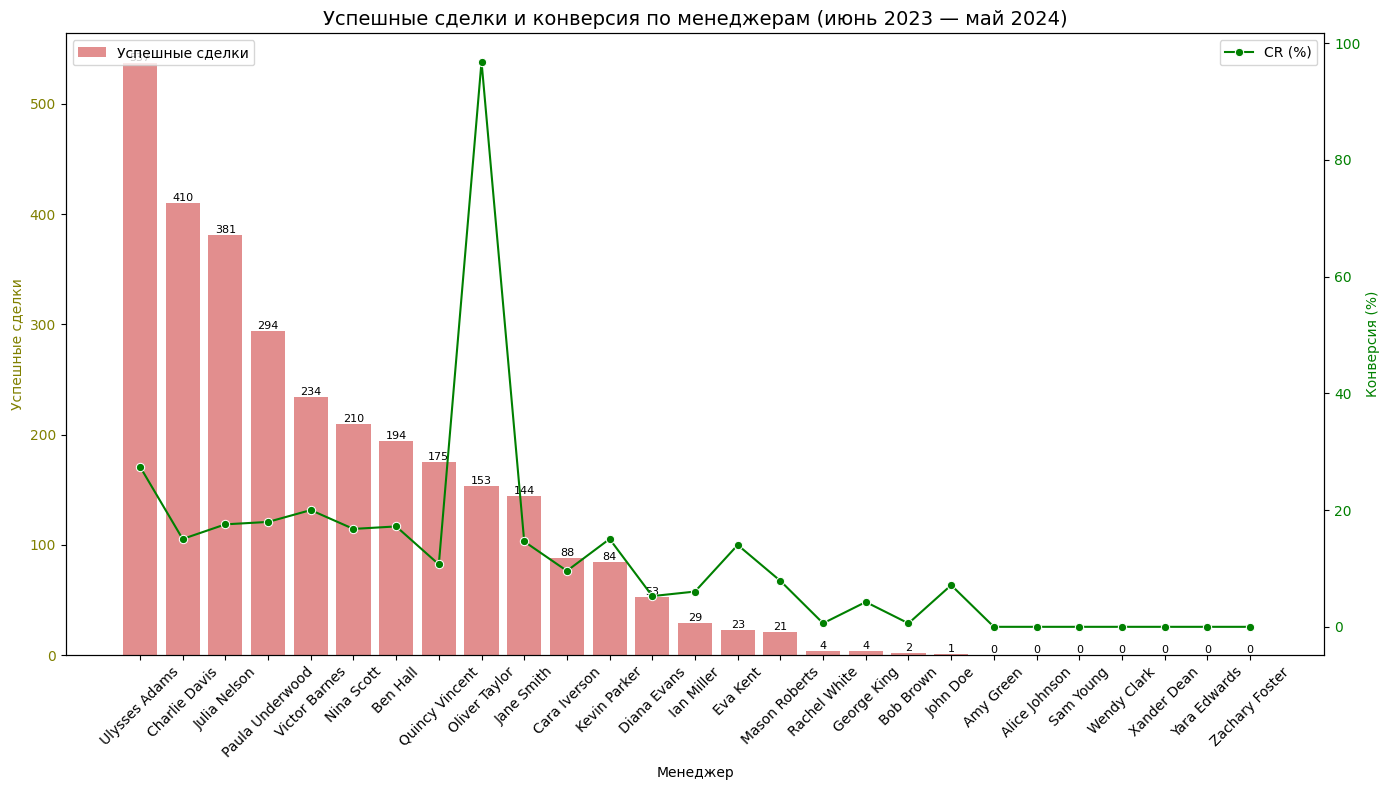

In [60]:
# Преобразуем даты
deals_spend["Created Time"] = pd.to_datetime(deals_spend["Created Time"], errors="coerce")

# Фильтрация по дате: с июня 2023 по май 2024
start_date = "2023-06-01"
end_date = "2024-05-31"
filtered_df = deals_spend[
    (deals_spend["Created Time"] >= start_date) &
    (deals_spend["Created Time"] <= end_date)
].copy()

# Пересчёт успешных сделок и конверсии по менеджерам
filtered_df["Is Successful"] = filtered_df["Stage"] == "Payment Done"

owner_summary_filtered = filtered_df.groupby("Deal Owner Name").agg(
    total_deals=("Id", "count"),
    successful_deals=("Is Successful", "sum")
).reset_index()

owner_summary_filtered["conversion_rate"] = (
    owner_summary_filtered["successful_deals"] / owner_summary_filtered["total_deals"]
) * 100

# Убираем менеджеров без сделок
owner_summary_filtered = owner_summary_filtered[
    owner_summary_filtered["total_deals"] > 0
].sort_values(by="successful_deals", ascending=False)

# Построение графика
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(
    x="Deal Owner Name",
    y="successful_deals",
    data=owner_summary_filtered,
    color="lightcoral",
    ax=ax1,
    label="Успешные сделки"
)

ax2 = ax1.twinx()
sns.lineplot(
    x="Deal Owner Name",
    y="conversion_rate",
    data=owner_summary_filtered,
    marker='o',
    color="green",
    ax=ax2,
    label="CR (%)"
)

# Подписи
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=8, color='black')

ax1.set_title("Успешные сделки и конверсия по менеджерам (июнь 2023 — май 2024)", fontsize=14)
ax1.set_xlabel("Менеджер")
ax1.set_ylabel("Успешные сделки", color="olive")
ax1.tick_params(axis="y", labelcolor="olive")
ax1.tick_params(axis="x", rotation=45)

ax2.set_ylabel("Конверсия (%)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

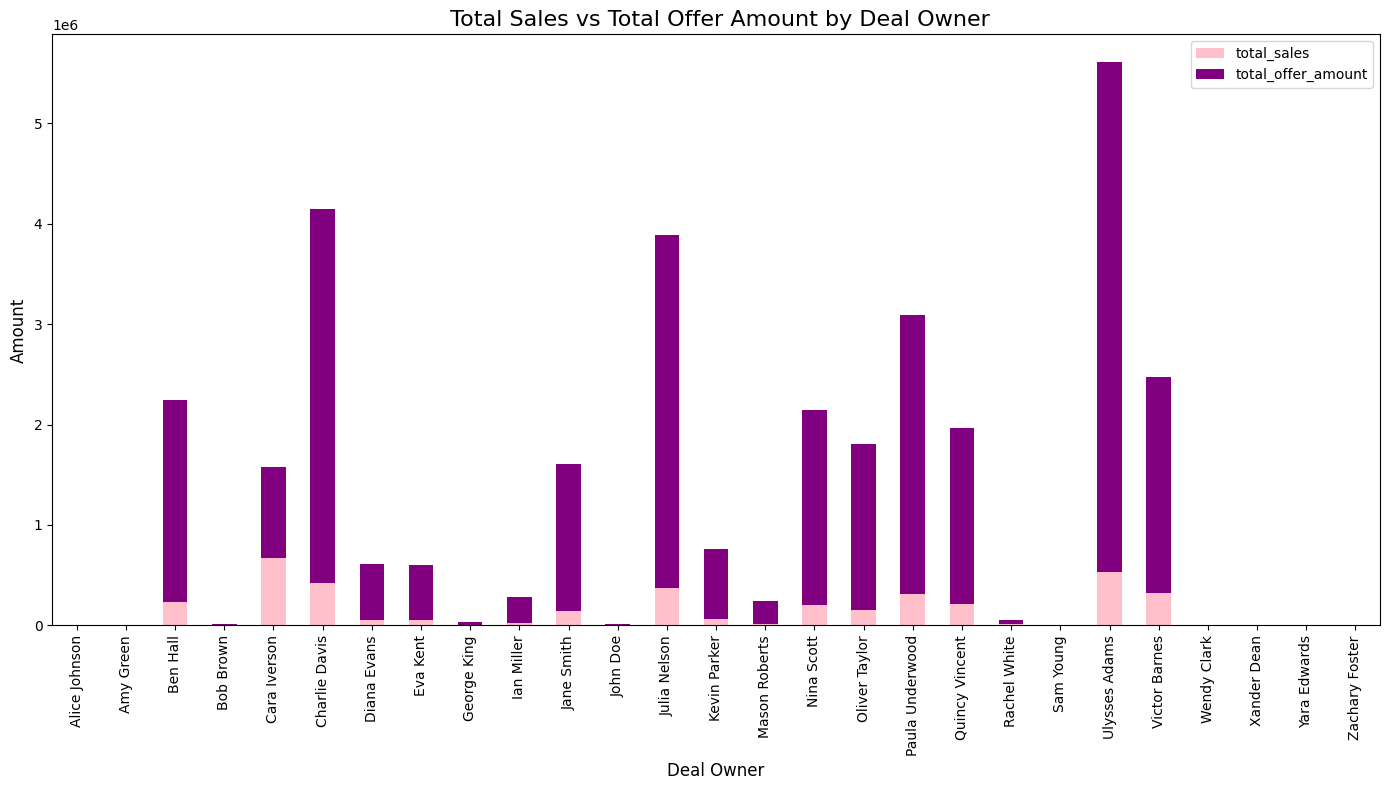

In [61]:
plt.figure(figsize=(14, 8))

owner_campaigns.plot(kind='bar', x='Deal Owner Name', y=['total_sales', 'total_offer_amount'],
                     stacked=True, color=['pink', 'purple'], figsize=(14, 8))


plt.title(' Total Sales vs Total Offer Amount by Deal Owner', fontsize=16)
plt.xlabel('Deal Owner', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='')

plt.tight_layout()
plt.show()

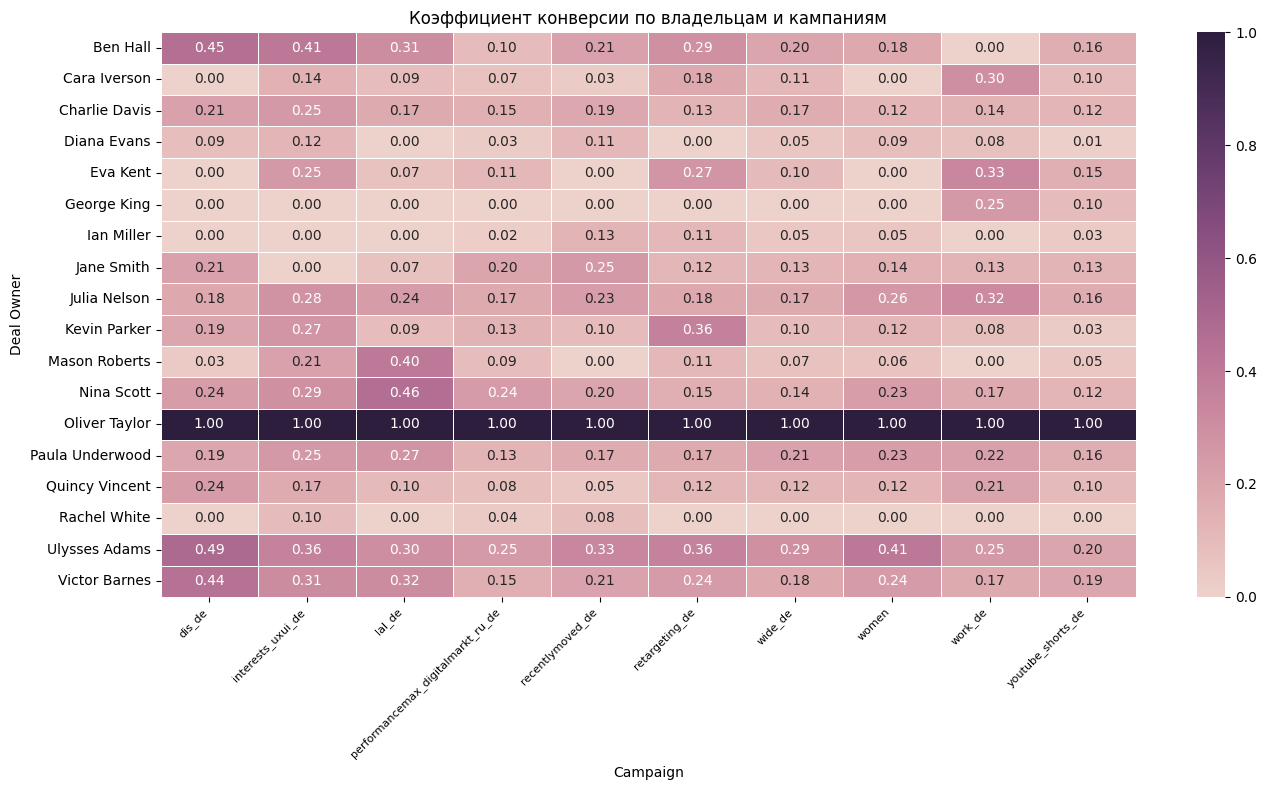

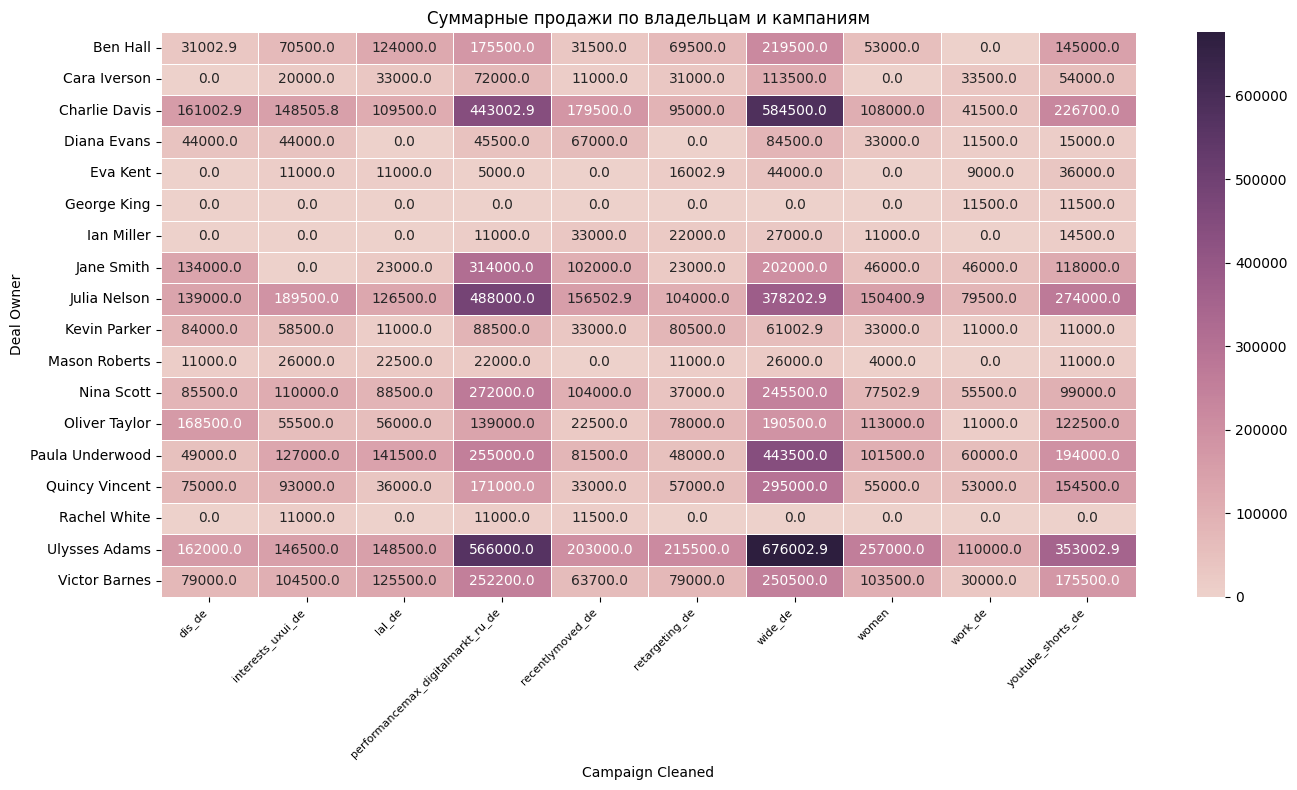

In [62]:
owner_campaigns = deals_spend[deals_spend['Campaign Cleaned'] != 'no campaign'].groupby(['Deal Owner Name', 'Campaign Cleaned']).agg(
    total_deals=('Status', 'count'),
    successful_deals=('Is Successful', 'sum'),
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
).reset_index()

owner_campaigns['conversion_rate'] = owner_campaigns['successful_deals'] / owner_campaigns['total_deals']


top_campaigns = owner_campaigns.groupby('Campaign Cleaned')['successful_deals'].sum().sort_values(ascending=False).head(10).index

filtered_owner_campaigns = owner_campaigns[owner_campaigns['Campaign Cleaned'].isin(top_campaigns)]
conversion_heatmap_data = filtered_owner_campaigns.pivot_table(
    values='conversion_rate',
    index='Deal Owner Name',
    columns='Campaign Cleaned',
    aggfunc='mean',
    fill_value=0
)

conversion_heatmap_data = conversion_heatmap_data.loc[
    (conversion_heatmap_data.sum(axis=1) > 0),
    (conversion_heatmap_data.sum(axis=0) > 0)
]

plt.figure(figsize=(14, 8))
sns.heatmap(conversion_heatmap_data, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Коэффициент конверсии по владельцам и кампаниям')
plt.xlabel('Campaign')
plt.ylabel('Deal Owner')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

offer_amount_heatmap_data = filtered_owner_campaigns.pivot_table(
    values='total_offer_amount',
    index='Deal Owner Name',
    columns='Campaign Cleaned',
    aggfunc='sum',
    fill_value=0
)

offer_amount_heatmap_data = offer_amount_heatmap_data.loc[
    (offer_amount_heatmap_data.sum(axis=1) > 0),
    (offer_amount_heatmap_data.sum(axis=0) > 0)
]

plt.figure(figsize=(14, 8))
sns.heatmap(offer_amount_heatmap_data, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.1f', cbar=True, linewidths=0.5)
plt.title('Суммарные продажи по владельцам и кампаниям')
plt.xlabel('Campaign Cleaned')
plt.ylabel('Deal Owner')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


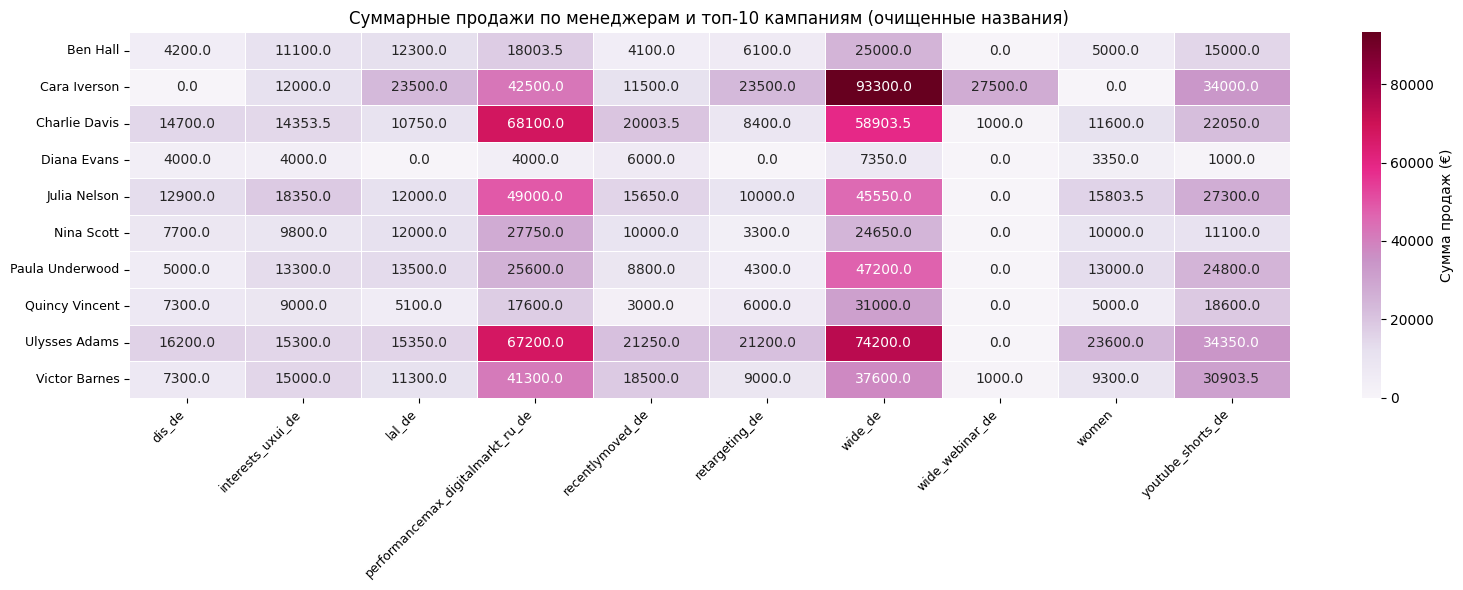

In [63]:
df_filtered = deals_spend[
    (deals_spend["Deal Owner Name"].notna()) &
    (deals_spend["Campaign Cleaned"].notna()) &
    (deals_spend["Campaign Cleaned"].str.lower() != "no campaign")
]

# Группировка
grouped = df_filtered.groupby(["Deal Owner Name", "Campaign Cleaned"]).agg(
    Deals=("Id", "count"),
    Successful=("Is Successful", "sum"),
    Total_Sales=("Initial Amount Paid", "sum")
).reset_index()

# Расчёт CR и заполнение пропусков
grouped["Conversion Rate (%)"] = (grouped["Successful"] / grouped["Deals"] * 100).round(2)
grouped["Total_Sales"] = grouped["Total_Sales"].fillna(0)

# Топ-10 кампаний и менеджеров
top_campaigns = grouped.groupby("Campaign Cleaned")["Deals"].sum().nlargest(10).index
top_owners = grouped.groupby("Deal Owner Name")["Deals"].sum().nlargest(10).index

# Фильтрация
filtered = grouped[
    grouped["Campaign Cleaned"].isin(top_campaigns) &
    grouped["Deal Owner Name"].isin(top_owners)
]

# Тепловая карта
pivot_sales = filtered.pivot(index="Deal Owner Name", columns="Campaign Cleaned", values="Total_Sales")

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_sales, annot=True, fmt=".1f", cmap="PuRd", linewidths=0.5, cbar_kws={'label': 'Сумма продаж (€)'})
plt.title("Суммарные продажи по менеджерам и топ-10 кампаниям (очищенные названия)")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


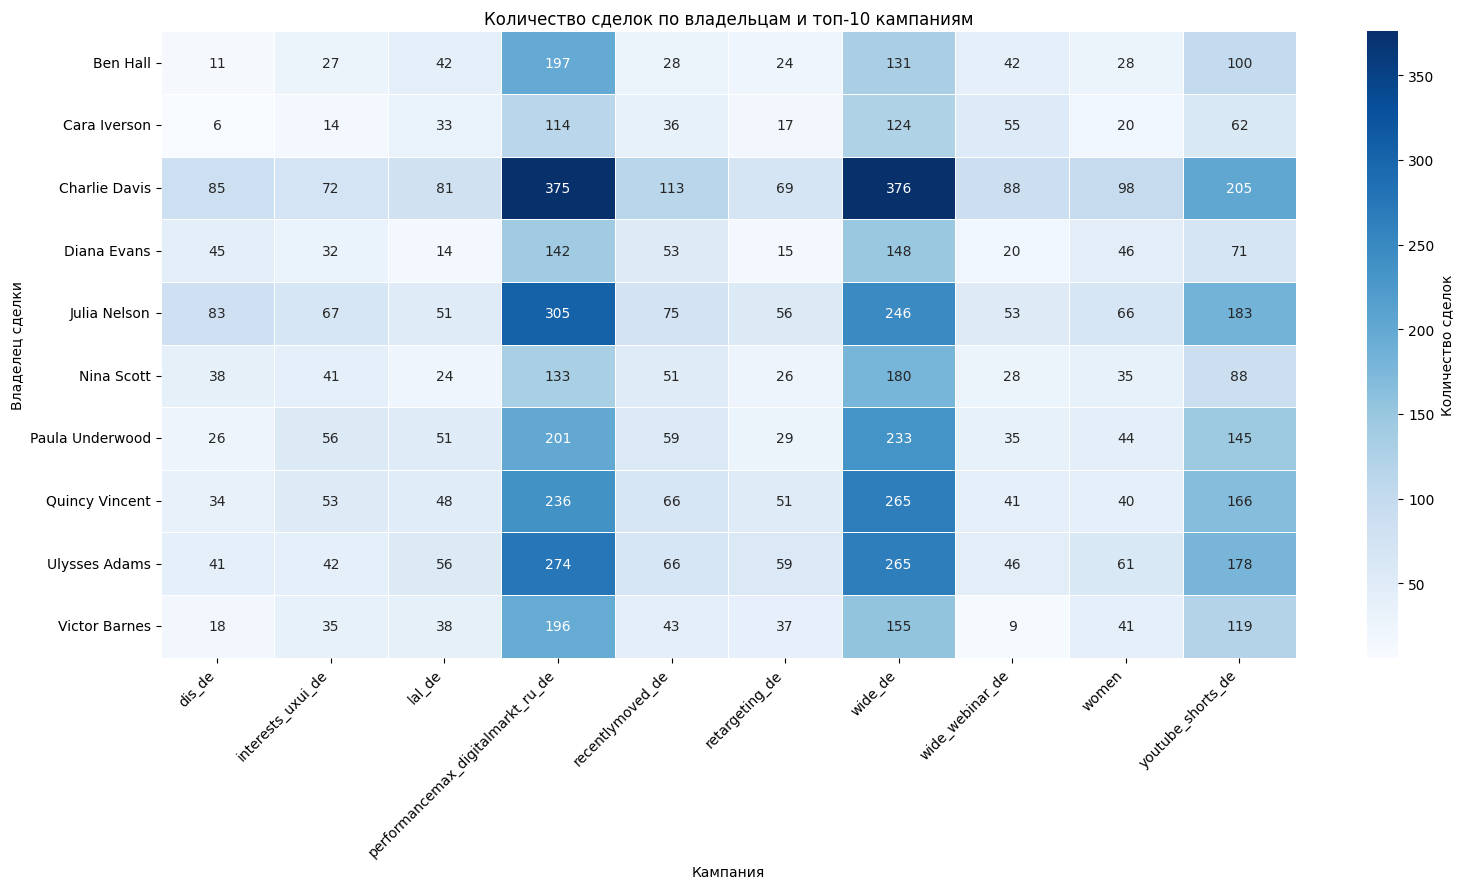

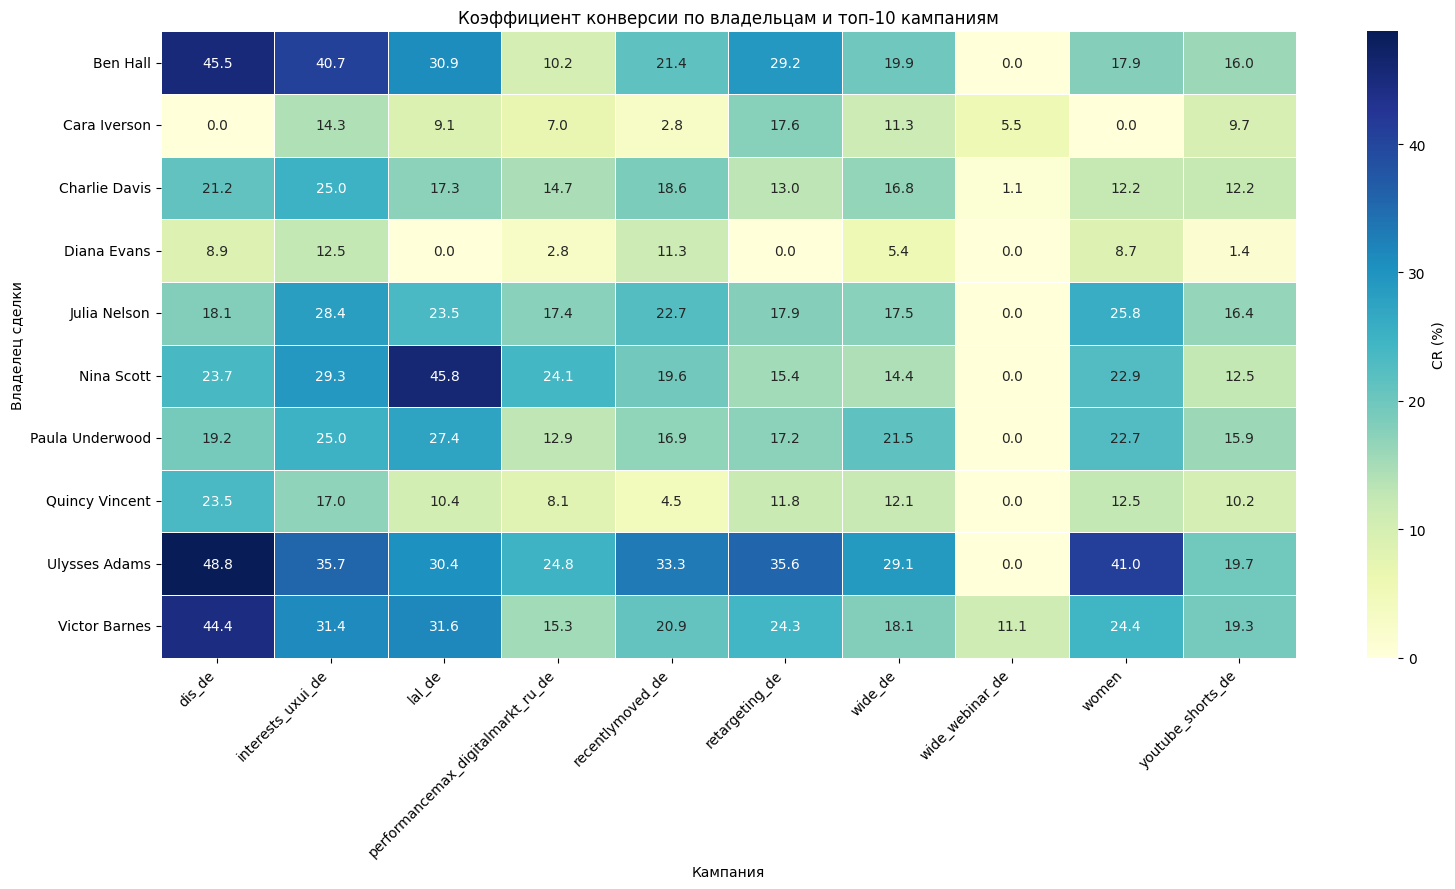

Deal Owner Name  Total_Deals  Successful  Total_Sales  Avg_CR  \
8    Ulysses Adams         1088         300     288650.0  29.829   
9    Victor Barnes          691         141     181203.5  24.090   
4     Julia Nelson         1185         216     206553.5  18.750   
2    Charlie Davis         1562         236     229860.5  15.209   
6  Paula Underwood          879         157     155500.0  17.886   
5       Nina Scott          644         123     116300.0  20.763   
0         Ben Hall          630         109     100803.5  23.160   
1     Cara Iverson          481          40     267800.0   7.725   
7   Quincy Vincent         1000         104     102600.0  11.011   
3      Diana Evans          586          31      29700.0   5.105   

   Effectiveness Score  
8         86101.408500  
9         43651.923150  
4         38728.781250  
2         34959.483445  
6         27812.730000  
5         24147.369000  
0         23346.090600  
1         20687.550000  
7         11297.286000  
3          1516.185000

In [64]:
# Построим тепловую карту количества сделок по тем же фильтрам
pivot_deals = filtered.pivot(index="Deal Owner Name", columns="Campaign Cleaned", values="Deals")

plt.figure(figsize=(16, 9))
sns.heatmap(pivot_deals, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Количество сделок'})
plt.title("Количество сделок по владельцам и топ-10 кампаниям")
plt.xlabel("Кампания")
plt.ylabel("Владелец сделки")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Построим тепловую карту коэффициента конверсии
pivot_cr = filtered.pivot(index="Deal Owner Name", columns="Campaign Cleaned", values="Conversion Rate (%)")

plt.figure(figsize=(16, 9))
sns.heatmap(pivot_cr, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'CR (%)'})
plt.title("Коэффициент конверсии по владельцам и топ-10 кампаниям")
plt.xlabel("Кампания")
plt.ylabel("Владелец сделки")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Рейтинг лучших менеджеров по общей эффективности
ranking = filtered.groupby("Deal Owner Name").agg(
    Total_Deals=("Deals", "sum"),
    Successful=("Successful", "sum"),
    Total_Sales=("Total_Sales", "sum"),
    Avg_CR=("Conversion Rate (%)", "mean")
).reset_index()

ranking["Effectiveness Score"] = ranking["Avg_CR"] * ranking["Total_Sales"] / 100
ranking = ranking.sort_values(by="Effectiveness Score", ascending=False)

ranking


In [65]:
# Топ-10 лучших менеджеров по эффективности
top_10_effective = ranking.nlargest(10, "Effectiveness Score")

# Топ-10 наименее эффективных (но только у кого есть сделки и CR > 0)
filtered_ranking = ranking[(ranking["Total_Deals"] > 0) & (ranking["Avg_CR"] > 0)]

# Отображаем результат
top_10_effective

Deal Owner Name  Total_Deals  Successful  Total_Sales  Avg_CR  \
8    Ulysses Adams         1088         300     288650.0  29.829   
9    Victor Barnes          691         141     181203.5  24.090   
4     Julia Nelson         1185         216     206553.5  18.750   
2    Charlie Davis         1562         236     229860.5  15.209   
6  Paula Underwood          879         157     155500.0  17.886   
5       Nina Scott          644         123     116300.0  20.763   
0         Ben Hall          630         109     100803.5  23.160   
1     Cara Iverson          481          40     267800.0   7.725   
7   Quincy Vincent         1000         104     102600.0  11.011   
3      Diana Evans          586          31      29700.0   5.105   

   Effectiveness Score  
8         86101.408500  
9         43651.923150  
4         38728.781250  
2         34959.483445  
6         27812.730000  
5         24147.369000  
0         23346.090600  
1         20687.550000  
7         11297.286000  
3          1516.185000

In [66]:
bottom_10_effective = filtered_ranking.nsmallest(10, "Effectiveness Score")
bottom_10_effective

Deal Owner Name  Total_Deals  Successful  Total_Sales  Avg_CR  \
3      Diana Evans          586          31      29700.0   5.105   
7   Quincy Vincent         1000         104     102600.0  11.011   
1     Cara Iverson          481          40     267800.0   7.725   
0         Ben Hall          630         109     100803.5  23.160   
5       Nina Scott          644         123     116300.0  20.763   
6  Paula Underwood          879         157     155500.0  17.886   
2    Charlie Davis         1562         236     229860.5  15.209   
4     Julia Nelson         1185         216     206553.5  18.750   
9    Victor Barnes          691         141     181203.5  24.090   
8    Ulysses Adams         1088         300     288650.0  29.829   

   Effectiveness Score  
3          1516.185000  
7         11297.286000  
1         20687.550000  
0         23346.090600  
5         24147.369000  
6         27812.730000  
2         34959.483445  
4         38728.781250  
9         43651.923150  
8         86101.408500

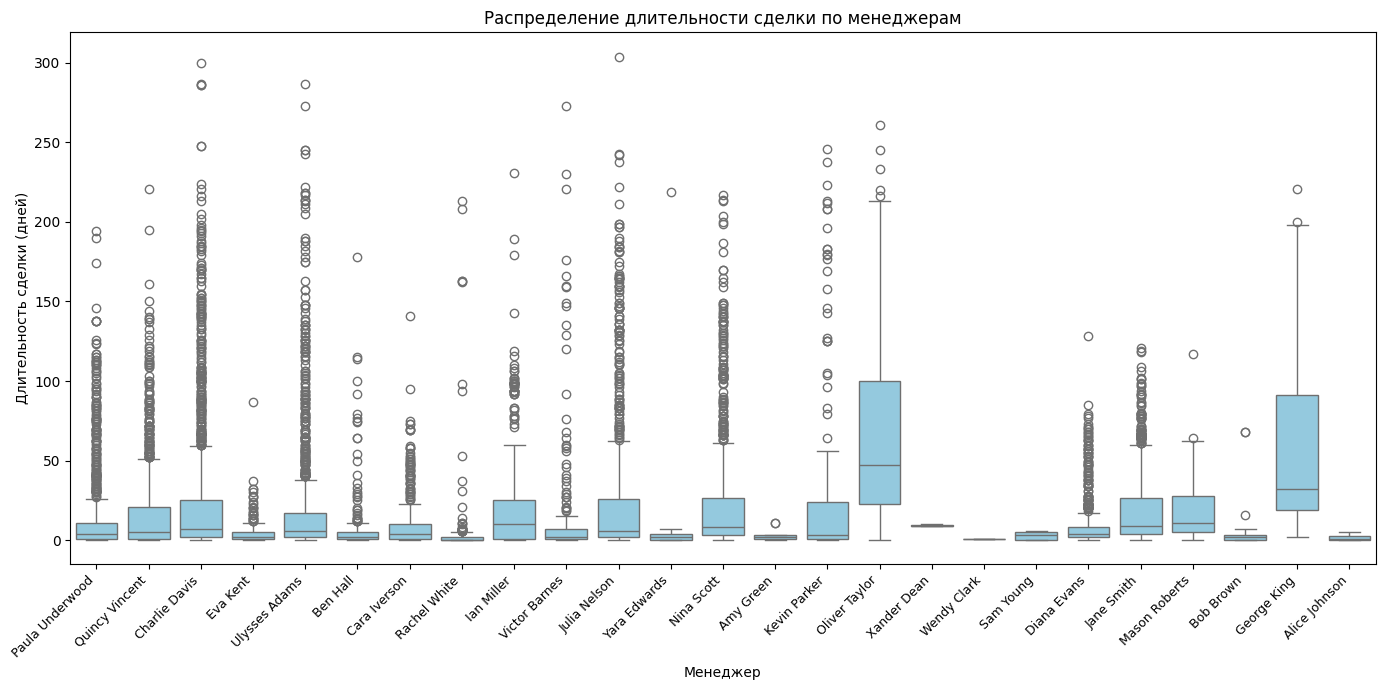

In [67]:
# Создаем поле длительности сделки в днях
deals_spend["Lead Duration (days)"] = (deals_spend["Closing Date"] - deals_spend["Created Time"]).dt.days

# Убираем отрицательные и пропущенные значения
duration_filtered = deals_spend[
    (deals_spend["Lead Duration (days)"].notna()) & (deals_spend["Lead Duration (days)"] >= 0)
]

# BOXplot по менеджерам
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=duration_filtered,
    x="Deal Owner Name",
    y="Lead Duration (days)",
    color="skyblue"
)
plt.title("Распределение длительности сделки по менеджерам")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylabel("Длительность сделки (дней)")
plt.xlabel("Менеджер")
plt.tight_layout()
plt.show()



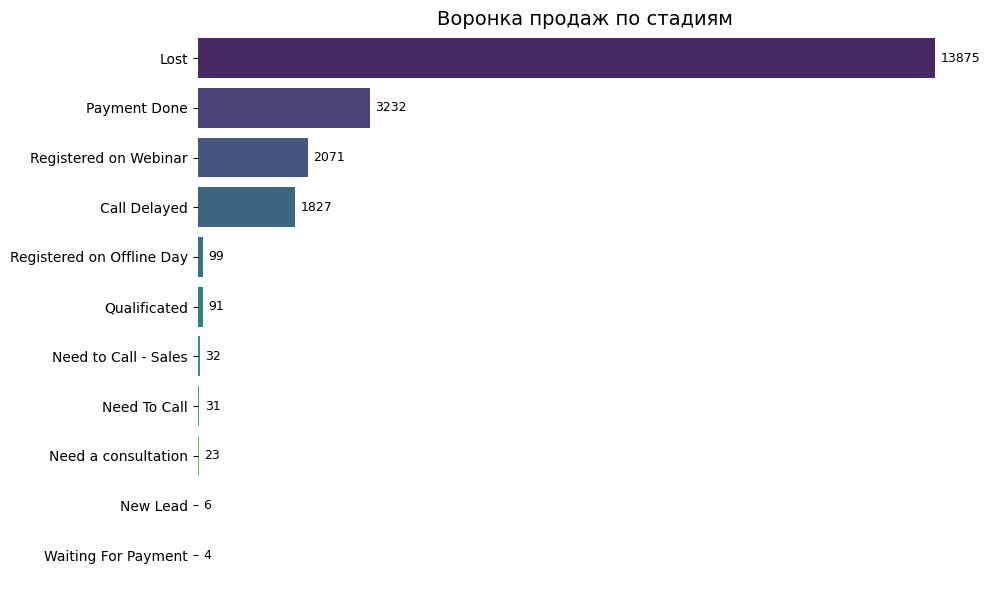

In [68]:
# Считаем количество сделок на каждом этапе
stage_counts = deals_spend["Stage"].value_counts().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=stage_counts.values,
    y=stage_counts.index,
    hue=stage_counts.index,
    palette="viridis",
    legend=False
)

# Удаляем рамки графика
sns.despine(left=True, bottom=True)

# Добавляем подписи
for i, value in enumerate(stage_counts.values):
    ax.text(value + 100, i, str(value), va="center", fontsize=9)

plt.title("Воронка продаж по стадиям", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()
plt.show()


# **# Анализ платежей и продуктов:**
1. Изучите распеределение типов оплаты и их влияния на успешность сделок
2. Проанализируйте популярность и успешность различных продуктов и типов обучения

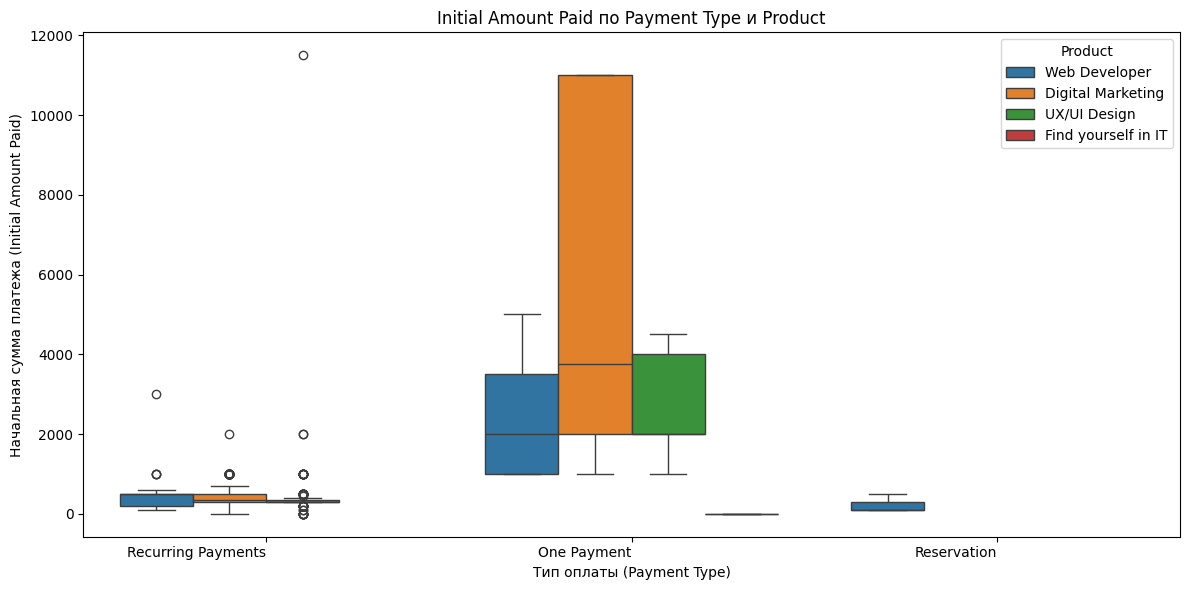

In [69]:
filtered_deals = deals_spend[
    (deals_spend['Initial Amount Paid'] > 0) &
    (deals_spend['Product'] != 'Not chosen')
]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_deals,
    x='Payment Type',
    y='Initial Amount Paid',
    hue='Product'
)

plt.title('Initial Amount Paid по Payment Type и Product')
plt.xlabel('Тип оплаты (Payment Type)')
plt.ylabel('Начальная сумма платежа (Initial Amount Paid)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

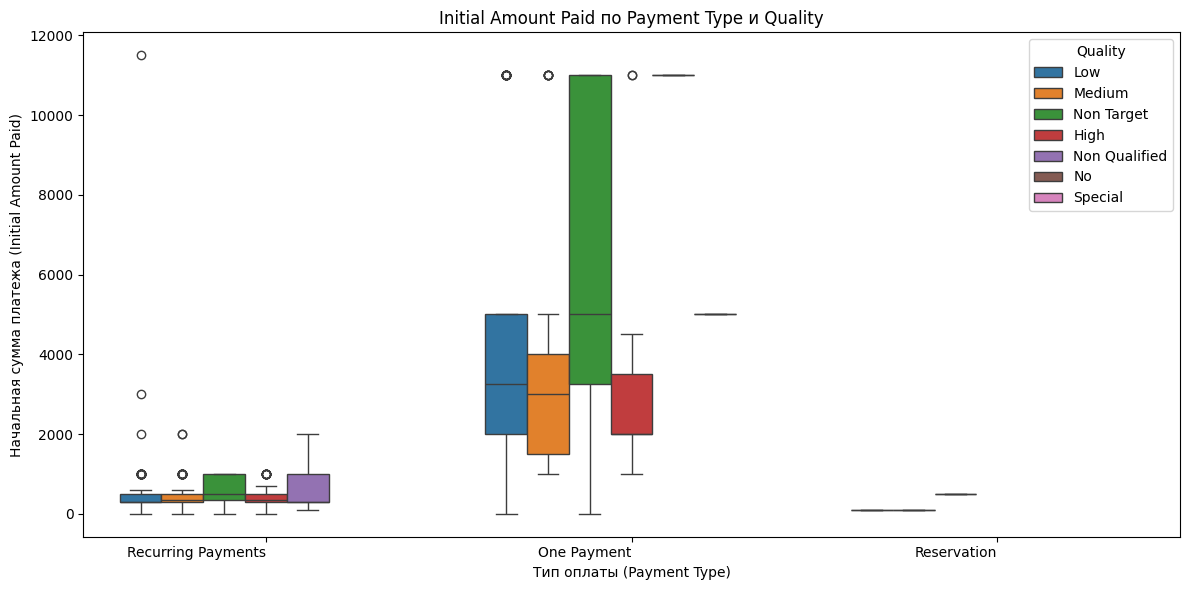

In [70]:

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_deals,
    x='Payment Type',
    y='Initial Amount Paid',
    hue='Quality'
)

plt.title('Initial Amount Paid по Payment Type и Quality')
plt.xlabel('Тип оплаты (Payment Type)')
plt.ylabel('Начальная сумма платежа (Initial Amount Paid)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Оценка распределения типов оплаты и их влияния на успешность сделок
payment_analysis = deals_spend.groupby('Payment Type').agg(
    total_deals=('Id', 'count'),
    closed_deals=('Stage', lambda x: (x == 'Payment Done').sum()),
    total_sales=('Offer Total Amount', 'sum')
)
payment_analysis['conversion_rate %'] = payment_analysis['closed_deals'] / payment_analysis['total_deals']*100

print("Распределение типов оплаты и их влияние на успешность сделок:")
display(payment_analysis)

Распределение типов оплаты и их влияние на успешность сделок:


total_deals  closed_deals  total_sales  conversion_rate %
Payment Type                                                                 
One Payment                 177           174     850031.0          98.305085
Recurring Payments          539           482    2499514.5          89.424861
Reservation                   3             2       7500.0          66.666667

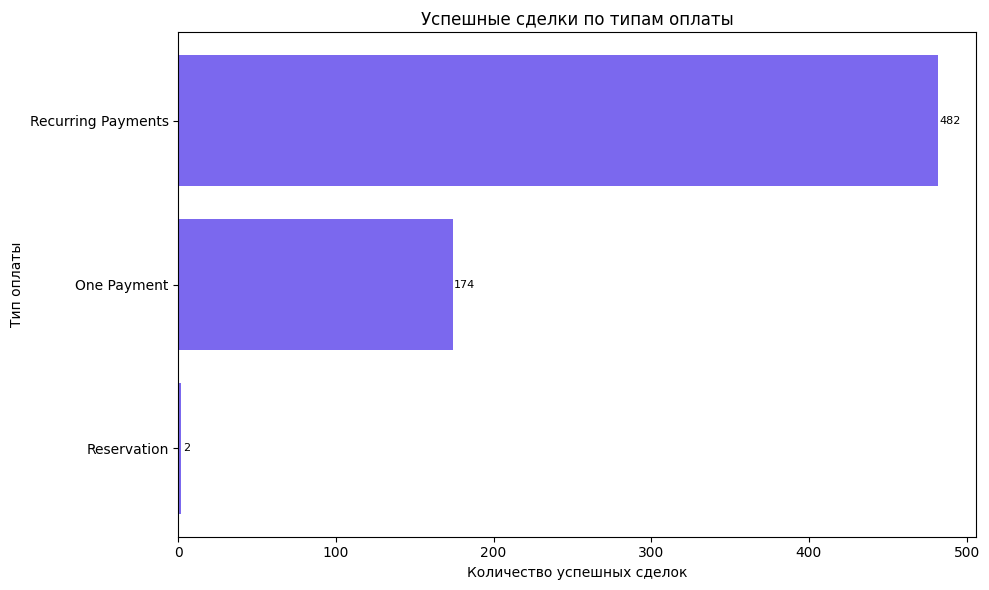

In [72]:
# Группировка по типу оплаты
payment_summary = deals_spend.groupby("Payment Type").agg({
    "Id": "count",
    "Stage": lambda x: (x == "Payment Done").sum()
}).reset_index()

payment_summary.columns = ["Payment Type", "Total Deals", "Successful Deals"]
payment_summary["Conversion Rate (%)"] = (payment_summary["Successful Deals"] / payment_summary["Total Deals"]) * 100
payment_summary["Conversion Rate (%)"] = payment_summary["Conversion Rate (%)"].round(2)

# Сортировка
payment_summary = payment_summary.sort_values(by="Successful Deals", ascending=False)

# Визуализация
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(payment_summary["Payment Type"], payment_summary["Successful Deals"], color="mediumslateblue")
ax.set_title("Успешные сделки по типам оплаты")
ax.set_xlabel("Количество успешных сделок")
ax.set_ylabel("Тип оплаты")
ax.invert_yaxis()

# Подписи к барам
for bar, val in zip(bars, payment_summary["Successful Deals"]):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, str(val), va="center", fontsize=8)

plt.tight_layout()
plt.show()


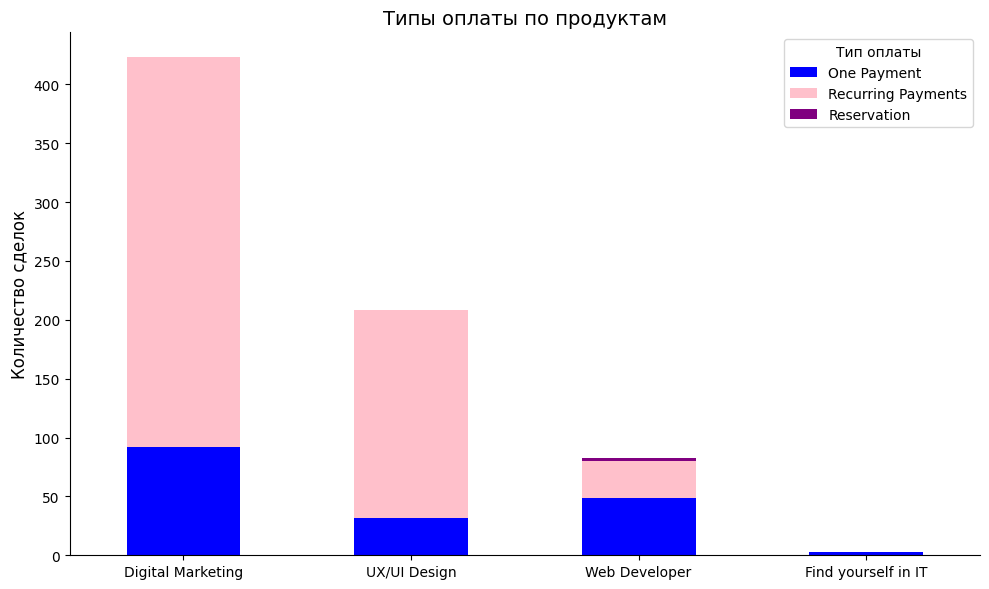

In [73]:
# Группировка: сколько раз для каждого продукта использовался каждый тип оплаты
product_payment = deals_spend.groupby(["Product", "Payment Type"]).size().unstack(fill_value=0)

# Сортировка по общему количеству (по строкам)
product_payment["Total"] = product_payment.sum(axis=1)
product_payment_sorted = product_payment.sort_values(by="Total", ascending=False).drop(columns="Total")

# Построение графика
custom_colors = ["blue", "pink", "purple"]  # Синий, оранжевый, зелёный

ax = product_payment_sorted.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=custom_colors,
    edgecolor="none"
)

# Удаляем рамки сверху и справа
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title("Типы оплаты по продуктам", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("Количество сделок", fontsize=12)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Тип оплаты")
plt.tight_layout()
plt.show()


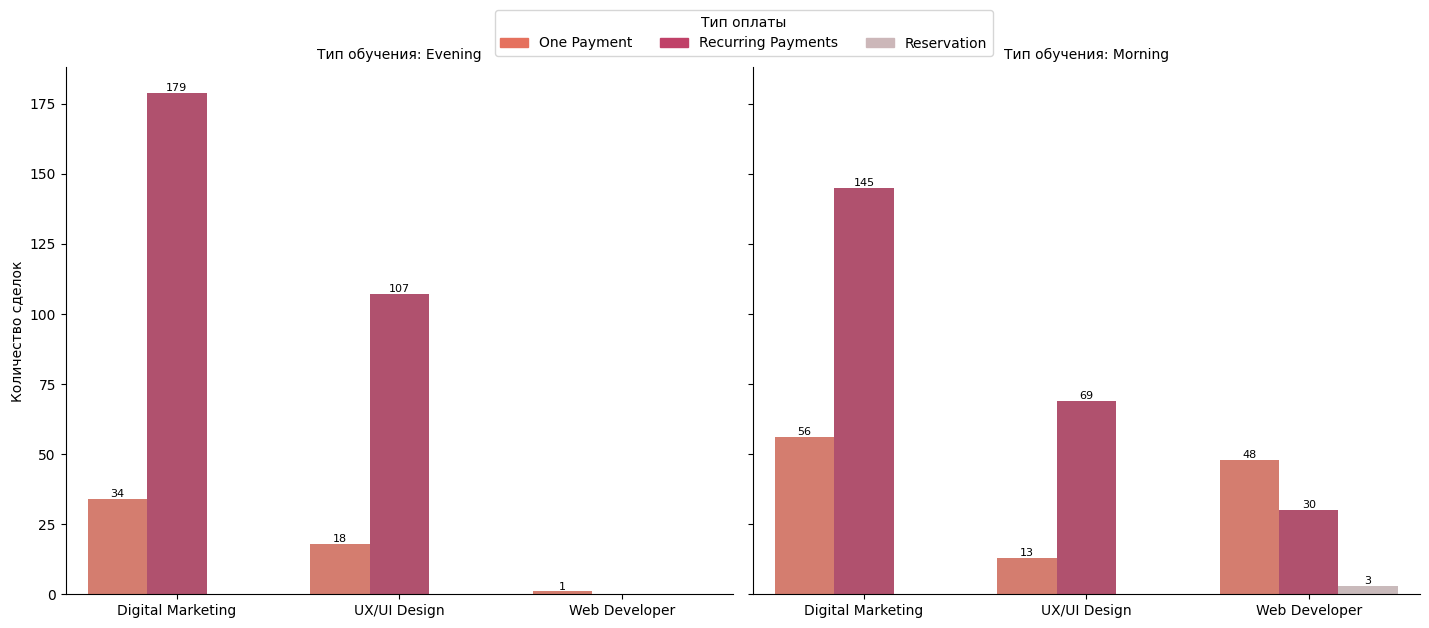

In [74]:
import matplotlib.patches as mpatches

# Подготовка данных
edu_product_payment = deals_spend.groupby(["Education Type", "Product", "Payment Type"]).size().reset_index(name="Count")
top_edu = edu_product_payment["Education Type"].value_counts().nlargest(3).index
edu_filtered = edu_product_payment[edu_product_payment["Education Type"].isin(top_edu)]

# Уникальные категории оплаты и цвета
payment_types = edu_filtered["Payment Type"].unique()
colors = ['#e5715e', '#c04168','#ccb7b9']
#sns.color_palette("Set2", n_colors=len(payment_types))

# Построение facet-графиков
g = sns.catplot(
    data=edu_filtered,
    x="Product",
    y="Count",
    hue="Payment Type",
    col="Education Type",
    kind="bar",
    height=6,
    aspect=1.2,
    palette=colors,
    legend=False  # отключаем встроенную легенду
)

# Добавление подписей к столбцам
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

# Названия и оси
g.set_titles("Тип обучения: {col_name}")
g.set_axis_labels("", "Количество сделок")
g.set_xticklabels(rotation=0, ha="center")

# Ручная легенда по центру
legend_handles = [mpatches.Patch(color=col, label=label) for col, label in zip(colors, payment_types)]
g.fig.legend(
    handles=legend_handles,
    loc="upper center",
    bbox_to_anchor=(0.52, 1.05),
    ncol=len(payment_types),
    title="Тип оплаты"
)

plt.tight_layout()
plt.show()

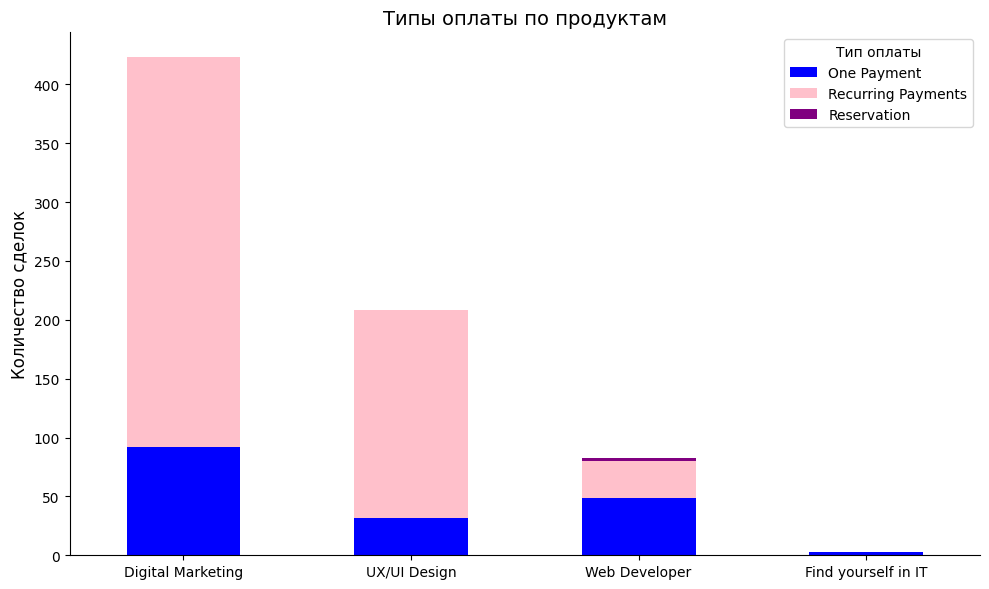

In [75]:
# Построение графика
custom_colors = ["blue", "pink", "purple"]  # Синий, оранжевый, зелёный

ax = product_payment_sorted.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=custom_colors,
    edgecolor="none"
)

# Удаляем рамки сверху и справа
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title("Типы оплаты по продуктам", fontsize=14)
plt.xlabel("", fontsize=12)
plt.ylabel("Количество сделок", fontsize=12)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Тип оплаты")
plt.tight_layout()
plt.show()

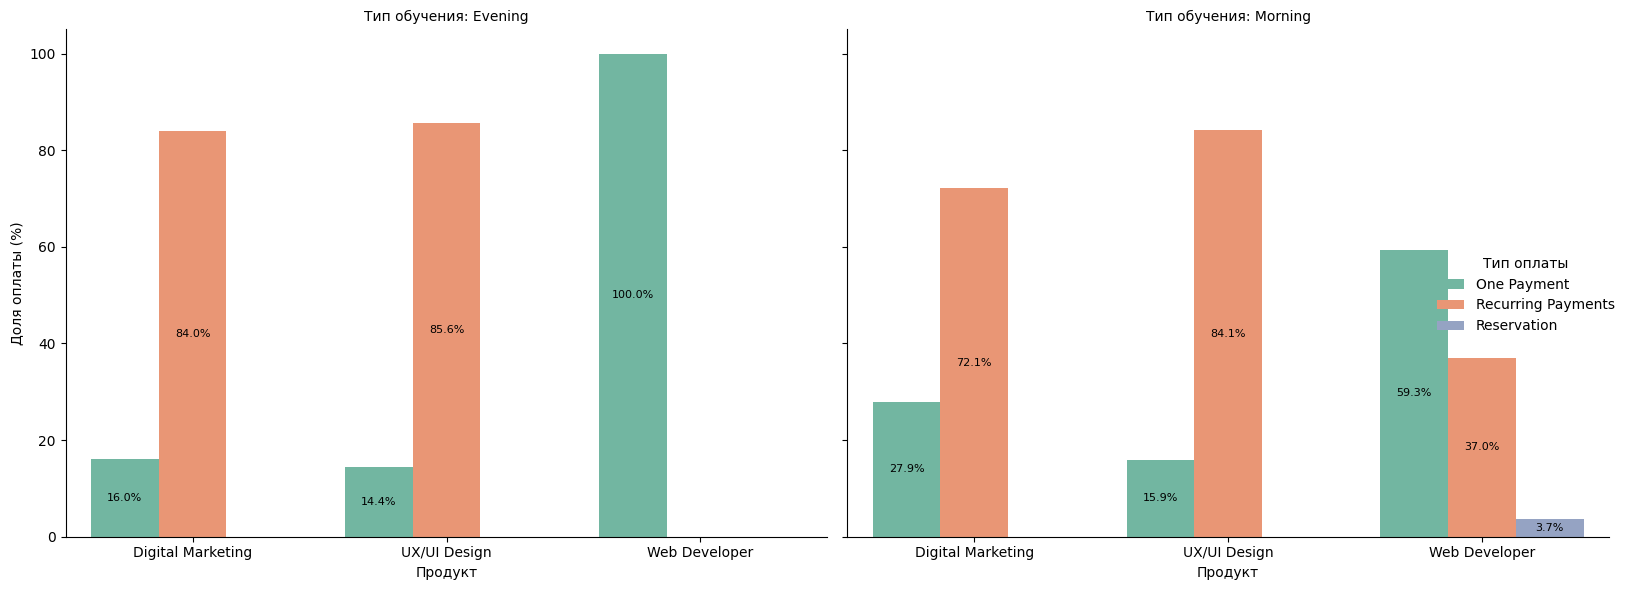

In [76]:
# Посчитаем долю типов оплаты внутри каждого продукта и обучения
edu_pct = edu_filtered.copy()

# Группировка для расчета процентных долей
edu_pct["Total"] = edu_pct.groupby(["Education Type", "Product"])["Count"].transform("sum")
edu_pct["Share (%)"] = (edu_pct["Count"] / edu_pct["Total"] * 100).round(1)

# Построение stacked bar plot по долям
g = sns.catplot(
    data=edu_pct,
    kind="bar",
    x="Product",
    y="Share (%)",
    hue="Payment Type",
    col="Education Type",
    height=6,
    aspect=1.2,
    palette="Set2"
)

g.set_titles("Тип обучения: {col_name}")
g.set_axis_labels("Продукт", "Доля оплаты (%)")
g.set_xticklabels(rotation=0, ha="center")
g._legend.set_title("Тип оплаты")

# Добавление процентных подписей
for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f"{v.get_height():.1f}%" if v.get_height() > 0 else "" for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.tight_layout()
plt.show()


# **# Географический анализ:**
1. Проанализируйте географическое распределение сделок по городам.
2. Изучите влияние уровня знания немецкого языка на успешность сделок в разных городах

In [77]:
#!pip install folium
import folium

In [78]:
city_coordinates = pd.read_csv('drive/MyDrive/Final_Project_ICH/CSV_file/worldcities.csv')
city_coordinates.head()

city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629

In [79]:
# Объединение датафрейма с городами с набором данных координат
deals_df.columns = deals_df.columns.str.lower()
#print(deals_df.head())

# 1. Группируем сделки по городам
city_deals = deals_df.groupby('city').agg(total_deals=('id', 'count')).reset_index()
city_deals = pd.merge(city_deals, city_coordinates, on='city', how='left')

# проверяем
# city_deals.head()

# Объединение датафрейма с городами с набором данных координат

deals_df.columns = deals_df.columns.str.lower()

# 1. Группируем сделки по городам
city_deals = deals_df.groupby('city').agg(total_deals=('id', 'count')).reset_index()
city_deals = pd.merge(city_deals, city_coordinates, on='city', how='left')

# Определение начальной точки карты
map_center = [city_deals['lat'].mean(), city_deals['lng'].mean()]
map = folium.Map(location=map_center, zoom_start=4)

# Добавление городов на карту
for i, row in city_deals.iterrows():
    if pd.notna(row['lat']) and pd.notna(row['lng']):
        folium.CircleMarker(
            location=[row['lat'], row['lng']],
            radius=row['total_deals']**0.5,  # Радиус зависит от количества сделок
            popup=f"{row['city']}: {row['total_deals']} сделок",  # Здесь исправлено на 'city'
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(map)

# Сохранение карты в файл
map.save('city_deals_map.html')

map

In [80]:
# Группируем стране
country_counts = deals_spend[deals_spend['Country']!= 'Other']['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Deals Count']

# Добавим долю
country_counts['Percentage'] = (
    (country_counts['Deals Count'] / country_counts['Deals Count'].sum()) * 100
).round(1).astype(str) + '%'

# Выведем таблицу
display(country_counts.head(10))  # Топ-10 стран


Country  Deals Count Percentage
0               Germany         2046      96.0%
1                Poland           22       1.0%
2               Austria           15       0.7%
3         United States            6       0.3%
4                Russia            6       0.3%
5               Ukraine            5       0.2%
6            Kazakhstan            4       0.2%
7  United Arab Emirates            2       0.1%
8               Hungary            2       0.1%
9                Serbia            2       0.1%

In [81]:
# Фильтрация без 'Unknown'
filtered_cities = deals_spend[deals_spend['City'] != 'Unknown']

# Группировка по городам
city_distribution = filtered_cities.groupby('City').agg(
    total_deals=('Id', 'count'),
    closed_deals=('Stage', lambda x: (x != 'Lost').sum()),
    total_sales=('Initial Amount Paid', 'sum')
).reset_index()

# Сортировка и вывод
top_cities = city_distribution.sort_values(by='total_deals', ascending=False).head(10).copy()

# Переименование столбцов
top_cities = top_cities.rename(columns={
    "City": "City",
    "total_deals": "Total Deals",
    "closed_deals": "Closed Deals",
    "total_sales": "Total Sales (th €)"
})

top_cities


City  Total Deals  Closed Deals  Total Sales (th €)
88       Berlin          181           173            186150.0
521     München           73            71             72103.5
288     Hamburg           62            61             62250.0
429     Leipzig           45            44             43650.0
570    Nürnberg           42            39             43200.0
177  Düsseldorf           32            30             36900.0
169     Dresden           28            25             24500.0
222   Frankfurt           27            26             26900.0
168    Dortmund           26            25             28350.0
405        Köln           24            22             37100.0

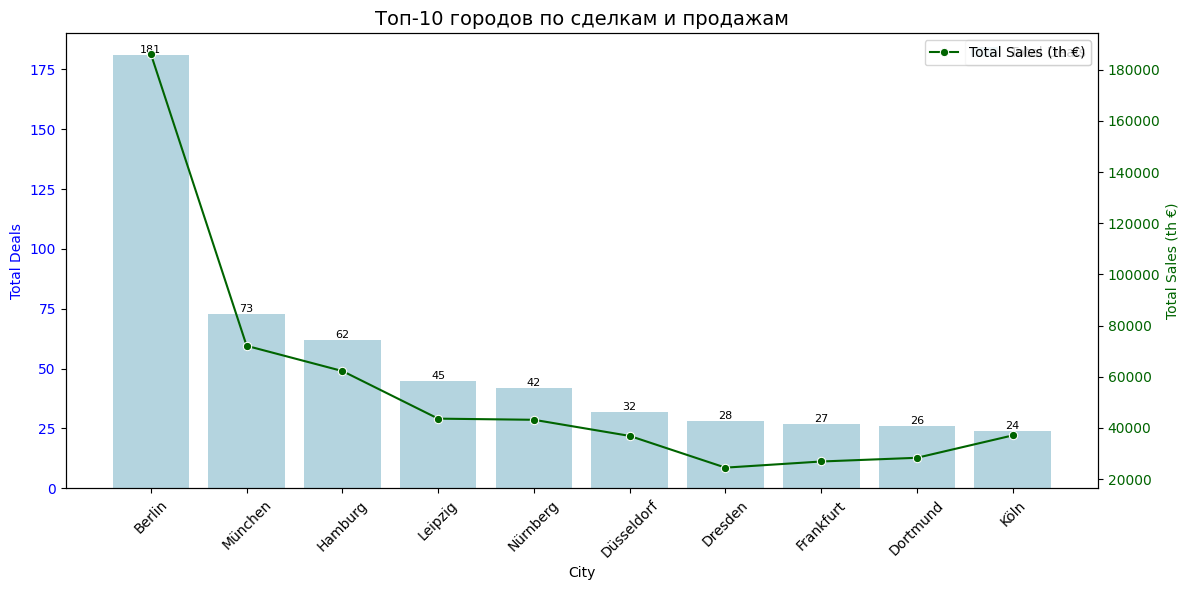

In [82]:
# Фильтрация без 'Unknown'
filtered_cities = deals_spend[deals_spend['City'] != 'Unknown']

# Группировка по городам
city_distribution = filtered_cities.groupby('City').agg(
    total_deals=('Id', 'count'),
    closed_deals=('Stage', lambda x: (x != 'Lost').sum()),
    total_sales=('Initial Amount Paid', 'sum')
).reset_index()

# Сортировка и выбор топ-10
top_cities = city_distribution.sort_values(by='total_deals', ascending=False).head(10).copy()

# Переименование столбцов
top_cities = top_cities.rename(columns={
    "City": "City",
    "total_deals": "Total Deals",
    "closed_deals": "Closed Deals",
    "total_sales": "Total Sales (th €)"
})

# Построение графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбцы: количество сделок
sns.barplot(
    data=top_cities,
    x="City",
    y="Total Deals",
    color="lightblue",
    ax=ax1,
    label="Total Deals"
)

# Линия: сумма продаж
ax2 = ax1.twinx()
sns.lineplot(
    data=top_cities,
    x="City",
    y="Total Sales (th €)",
    marker='o',
    color="darkgreen",
    ax=ax2,
    label="Total Sales (th €)"
)

# Подписи на столбцах
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=8, color='black')

# Оформление
ax1.set_title("Топ-10 городов по сделкам и продажам", fontsize=14)
ax1.set_xlabel("City")
ax1.set_ylabel("Total Deals", color="blue")
ax2.set_ylabel("Total Sales (th €)", color="darkgreen")

ax1.tick_params(axis="x", rotation=45)
ax1.tick_params(axis="y", labelcolor="blue")
ax2.tick_params(axis="y", labelcolor="darkgreen")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


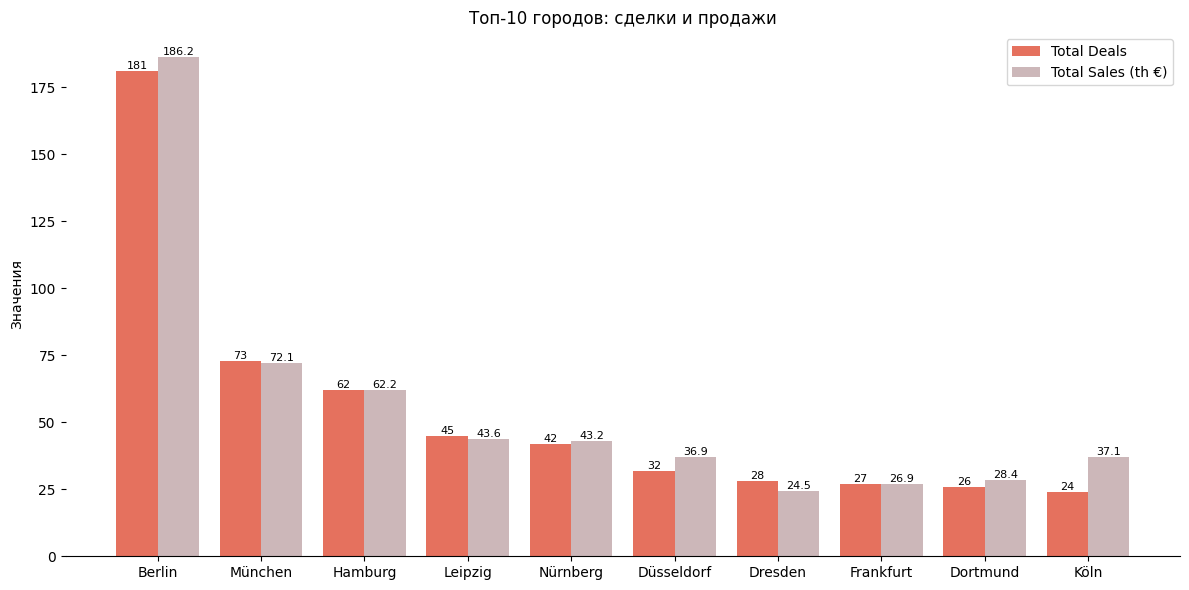

In [83]:
# Фильтрация без 'Unknown'
filtered_cities = deals_spend[deals_spend['City'] != 'Unknown']

# Группировка по городам
city_distribution = filtered_cities.groupby('City').agg(
    total_deals=('Id', 'count'),
    closed_deals=('Stage', lambda x: (x != 'Lost').sum()),
    total_sales=('Initial Amount Paid', 'sum')
).reset_index()

# Сортировка и выбор топ-10
top_cities = city_distribution.sort_values(by='total_deals', ascending=False).head(10).copy()

# Масштабируем сумму продаж (в тысячах €)
top_cities["Total Sales (th €)"] = (top_cities["total_sales"] / 1000).round(1)

# Задаём позиции для двух наборов столбцов
x = np.arange(len(top_cities))  # позиции по городам
width = 0.4  # ширина одного столбца

# Построение графика
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, top_cities["total_deals"], width, label="Total Deals", color="#e5715e")
bars2 = ax.bar(x + width/2, top_cities["Total Sales (th €)"], width, label="Total Sales (th €)", color="#ccb7b9")

# Подписи
ax.set_xticks(x)
ax.set_xticklabels(top_cities["City"], rotation=0, ha="center")
ax.set_ylabel("Значения")
ax.set_title("Топ-10 городов: сделки и продажи")
ax.legend()

# Подписи на столбцах
ax.bar_label(bars1, fontsize=8, label_type="edge")
ax.bar_label(bars2, fontsize=8, label_type="edge")

# Убираем рамки
sns.despine(top=True, right=True, left=True)

plt.tight_layout()
plt.show()

In [84]:
language_success = deals_spend.groupby(['City', 'Deutsch Level', 'Status']).size().reset_index(name='Deal Count')
language_success

City Deutsch Level        Status  Deal Count
0          Aachen            A2    Successful           1
1          Aachen            B1    Successful           5
2          Aachen       Unknown    Successful           3
3           Aalen       Unknown    Successful           1
4       Abensberg       Unknown    Successful           1
...           ...           ...           ...         ...
1199  Zwingenberg       Unknown    Successful           1
1200     Öhringen            A2    Successful           1
1201     Übelbach       Unknown    Successful           1
1202   Überlingen       Unknown  Unsuccessful           1
1203         Śrem       Unknown    Successful           1

[1204 rows x 4 columns]

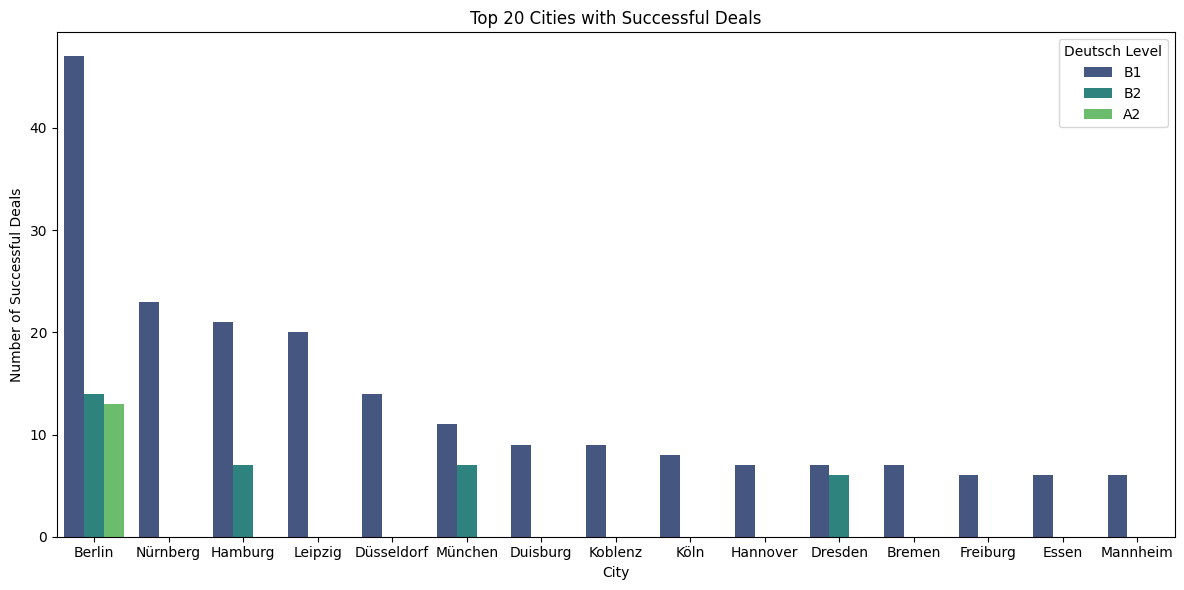

In [85]:
successful_deals = language_success[(language_success['Status'] == 'Successful') & (language_success['City'] != 'Unknown')  & (language_success['Deutsch Level'] != 'Unknown')  ]
successful_deals = successful_deals.sort_values(by='Deal Count', ascending=False)
top_successful_deals = successful_deals.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals, palette='viridis', hue='Deutsch Level')

plt.title('Top 20 Cities with Successful Deals')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


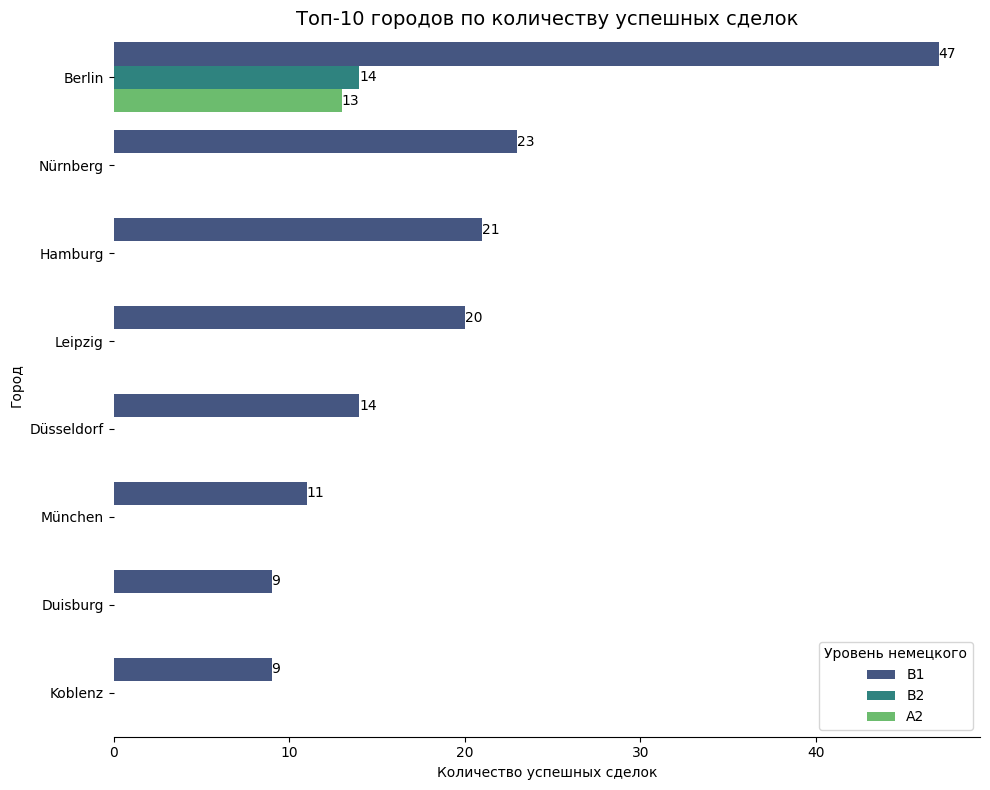

In [86]:
# Фильтрация и подготовка данных
successful_deals = language_success[
    (language_success['Status'] == 'Successful') &
    (language_success['City'] != 'Unknown') &
    (language_success['Deutsch Level'] != 'Unknown')
]

# Сортировка и выбор топ-10
successful_deals = successful_deals.sort_values(by='Deal Count', ascending=False)
top_successful_deals = successful_deals.head(10)

# Построение горизонтального графика
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    y='City',
    x='Deal Count',
    data=top_successful_deals,
    palette='viridis',
    hue='Deutsch Level'
)

# Убираем границы
sns.despine(top=True, right=True, left=True)

# Добавляем подписи к значениям
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')

# Оформление
plt.title('Топ-10 городов по количеству успешных сделок', fontsize=14)
plt.xlabel('Количество успешных сделок')
plt.ylabel('Город')
plt.legend(title='Уровень немецкого')
plt.tight_layout()
plt.show()


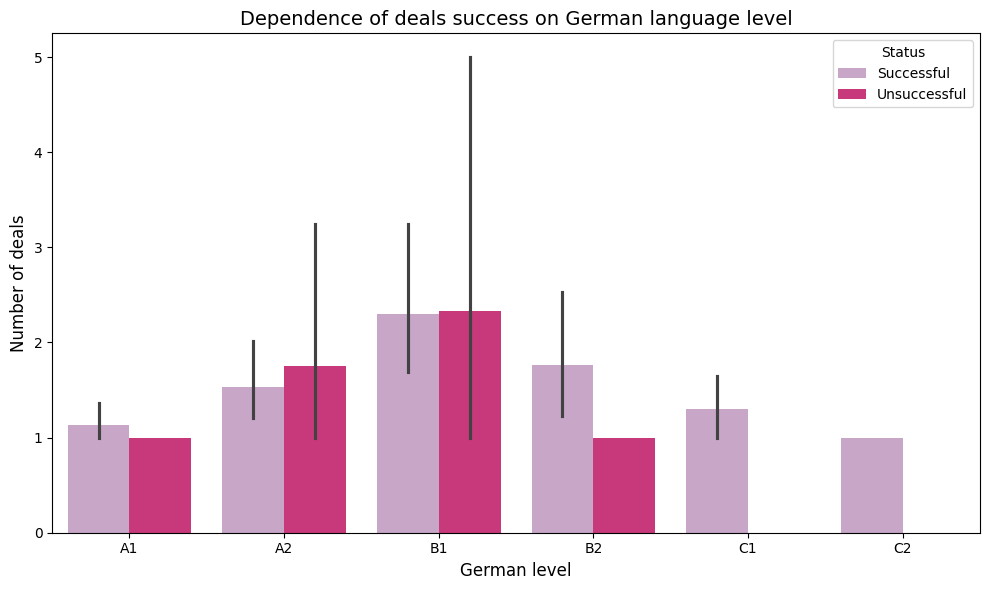

In [87]:
order = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

language_success['Deutsch Level'] = pd.Categorical(language_success['Deutsch Level'], categories=order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=language_success, x='Deutsch Level', y='Deal Count', hue='Status', palette='PuRd')

plt.title('Dependence of deals success on German language level', fontsize=14)
plt.xlabel('German level', fontsize=12)
plt.ylabel('Number of deals', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [88]:
language_success_pivot = language_success.pivot_table(index='Deutsch Level', columns='Status', values='Deal Count', aggfunc='sum')
language_success_pivot

<ipython-input-88-41208ca75d3f>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  language_success_pivot = language_success.pivot_table(index='Deutsch Level', columns='Status', values='Deal Count', aggfunc='sum')


Status         Successful  Unsuccessful
Deutsch Level                          
A1                     25             1
A2                    136             7
B1                    788            14
B2                    168             2
C1                     26             0
C2                      3             0

In [89]:
deals_df['Status'] = np.where(deals_df['initial amount paid'] > 0, 'Successful', 'Unsuccessful')
successful_deals_count = (deals_df['Status'] == 'Successful').sum()
successful_deals_count

np.int64(3243)